
# Objective

To predict which customer is more likely to purchase the newly introduced travel package.<br>

# Data Dictionary

### Customer details:

**CustomerID**: Unique customer ID<br>
**ProdTaken**: Whether the customer has purchased a package or not (0: No, 1: Yes)<br>
**Age**: Age of customer<br>
**TypeofContact**: How customer was contacted (Company Invited or Self Inquiry)<br>
**CityTier**: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3. It's the city the customer lives in.<br>
**Occupation**: Occupation of customer<br>
**Gender**: Gender of customer<br>
**umberOfPersonVisiting**: Total number of persons planning to take the trip with the customer<br>
**PreferredPropertyStar**: Preferred hotel property rating by customer<br>
**MaritalStatus**: Marital status of customer<br>
**NumberOfTrips**: Average number of trips in a year by customer<br>
**Passport**: The customer has a passport or not (0: No, 1: Yes)<br>
**OwnCar**: Whether the customers own a car or not (0: No, 1: Yes)<br>
**NumberOfChildrenVisiting**: Total number of children with age less than 5 planning to take the trip with the customer<br>
**Designation**: Designation of the customer in the current organization<br>
**MonthlyIncome**: Gross monthly income of the customer<br>

### Customer interaction data: 

**PitchSatisfactionScore**: Sales pitch satisfaction score<br>
**ProductPitched**: Product pitched by the salesperson<br>
**NumberOfFollowups**: Total number of follow-ups has been done by the salesperson after the sales pitch<br>
**DurationOfPitch**: Duration of the pitch by a salesperson to the customer<br>

## Imports

In [2]:
# to read and manipulate the data
import pandas as pd
import numpy as np

#used to set no limit on number of columns to be displayed
pd.set_option("display.max_rows",200)
#used to set limit on number of rows to be displayed
pd.set_option("display.max_columns",None)

# for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to avoid Warnings note and depprecation notes
import warnings
warnings.filterwarnings("ignore")

# to evaluate the models
import sklearn.metrics

# to split data into train test
from sklearn.model_selection import train_test_split

#tune different models
from sklearn.model_selection import GridSearchCV

# Decision tree Claasifier model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Ensemble technique classifier models
from sklearn.ensemble import (
    BaggingClassifier,
    StackingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier
)

#most popular ensemble technique clasiifier XGBoost model
import xgboost as xgb
from xgboost import XGBClassifier

# Logistic Regression model
from sklearn.linear_model import LogisticRegression

# to check the performance of the model - model metrics
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    make_scorer,
    confusion_matrix
)

from sklearn.naive_bayes import GaussianNB, BernoulliNB


## Load the data

In [3]:
#Reading the excel file
tdata_xls= pd.ExcelFile("Tourism.xlsx")
# reading the fist sheet tab in the Excel File
tdata_datadict=pd.read_excel(tdata_xls,"Data Dict")
# reading the second sheet tab in the Excel File
tdata_data=pd.read_excel(tdata_xls,"Tourism")

In [4]:
# Copying data to another variable to avoid changes to original data
data =tdata_data.copy()

## Checking the first 5 row

In [5]:
# used to disply first 5 rows
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Checking the first 5 row

In [6]:
# used to disply last 5 rows
data.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


## Shape of the Data

In [7]:
# checking the shape of data
data.shape

(4888, 20)

#### Observations
1. There are 4888 rows and 20 columns in the dataset.

## Data Information

In [8]:
# Basic information on the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

#### Observations
1. ProdTaken is the target variable here whihc is of type int.
2. TypeofContact, Occupation, Gender, ProductPitched, MaritalStatus and Designation are all of type object.
3. Age DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting and MonthlyIncome are all of type float.
4. There are missing values in the data which have to be treated.

# DATA PREPROCESSING

## Checking for Missing Values

In [9]:
# Checking for null values
data.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

#### Observations
1. There are missing values in the Age,TypeofContact,DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting and MonthlyIncome in the dataset. 
2. based on the distribution we will fill in the missing values.

In [10]:
data[data.duplicated()].count()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

#### Observations
1. There are no duplicated values in the dataset

## Treating missing data in Age column

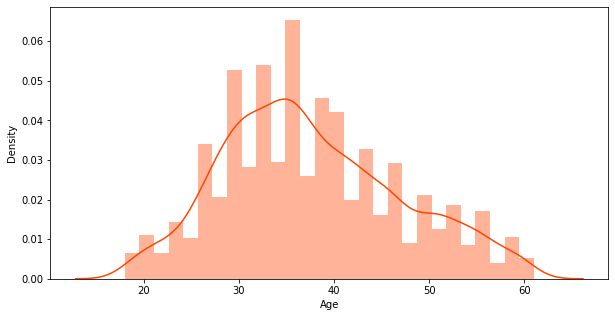

In [11]:
#used to see the distribution of Age data
plt.figure(figsize=(10, 5))
sns.distplot(data["Age"], kde=True, color="orangered")
plt.show()

#### Observations
1. The data is normally distributed and so we can impute the missing values with the mean as it is unskewed data.

In [12]:
# Filling the missing values with mean of Age values
data["Age"].fillna(data["Age"].mean(), inplace=True)

## Treating missing data in TypeofContact column

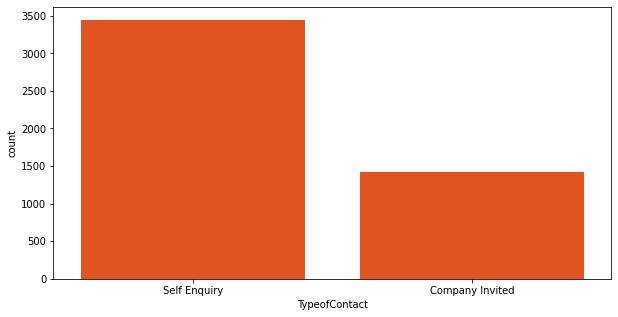

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data,x="TypeofContact", color="orangered")
plt.show()

#### Observations
1. Since this column is a categorical variable, the most frequent value can be used to impute missing values which is the mode

In [14]:
# Filling the missing values with mode of TypeofContact values
data["TypeofContact"].fillna(data["TypeofContact"].mode()[0], inplace=True)

## Treating missing data in DurationOfPitch column

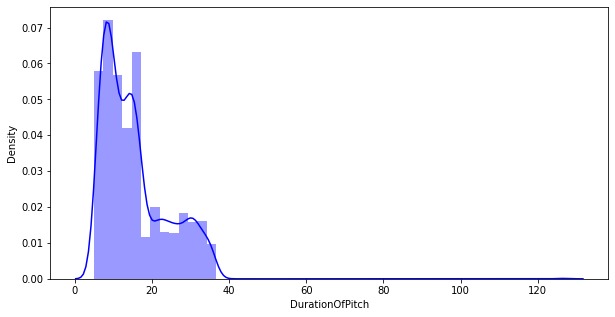

In [15]:
plt.figure(figsize=(10, 5))
sns.distplot(data["DurationOfPitch"], kde=True, color="blue")
plt.show()

#### Observations

1. The data is left skewed and so we can impute the missing values with the median as it is skewed data.

In [16]:
# Filling the missing values with median of DurationOfPitch values
data["DurationOfPitch"].fillna(data["DurationOfPitch"].median(), inplace=True)

## Treating Missing Data in NumberOfFollowups column

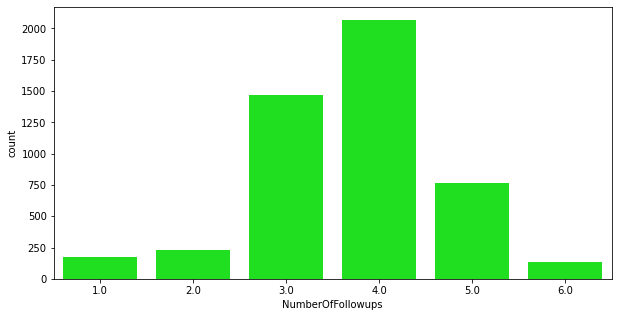

In [17]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data,x="NumberOfFollowups", color="lime")
plt.show()

#### Observation
1. For this column we can take the most frequent value of the numberoffollowups(mode) to impute the missing values.

In [18]:
# Filling the missing values with mode of NumberOfFollowups values
data["NumberOfFollowups"].fillna(data["NumberOfFollowups"].mode()[0], inplace=True)

## Treating Missing Data in PreferredPropertyStar column

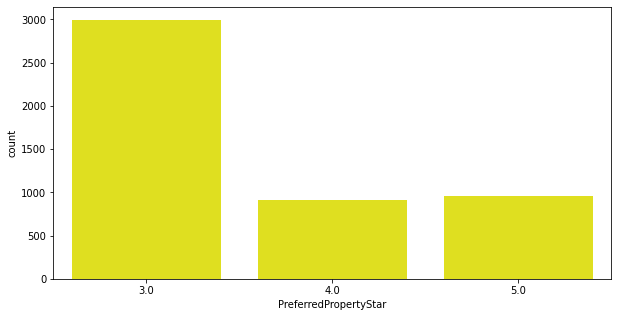

In [19]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data,x="PreferredPropertyStar", color="yellow")
plt.show()

#### Observation
1. For this column we can take the most frequent value of the PreferredPropertyStar(mode) to impute the missing values.

In [20]:
# Filling the missing values with mode of PreferredPropertyStar values
data["PreferredPropertyStar"].fillna(data["PreferredPropertyStar"].mode()[0], inplace=True)

## Treating Missing data in NumberOfTrips column

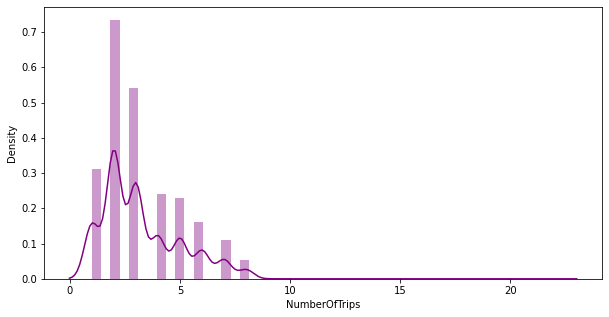

In [21]:
plt.figure(figsize=(10, 5))
sns.distplot(data["NumberOfTrips"], kde=True, color="purple")
plt.show()

#### Observation
1. The data is left skewed and so we can impute the missing values with the median as it is skewed data

In [22]:
# Filling the missing values with mode of NumberOfTrips values
data["NumberOfTrips"].fillna(data["NumberOfTrips"].median(), inplace=True)

## Treating Missing data in NumberOfChildrenVisiting column

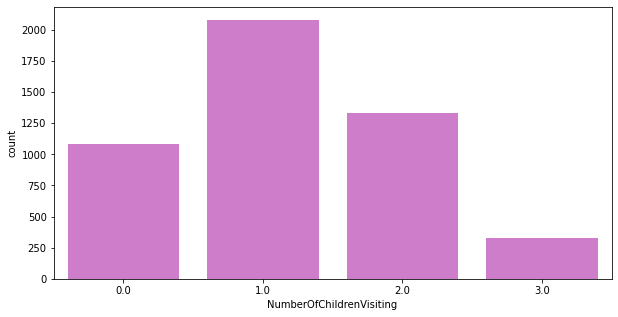

In [23]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data,x="NumberOfChildrenVisiting", color="orchid")
plt.show()

#### Observation
1. For this column we can take the most frequent value of the NumberOfChildrenVisiting(mode) to impute the missing values.

In [24]:
# Filling the missing values with mode of NumberOfChildrenVisiting values
data["NumberOfChildrenVisiting"].fillna(data["NumberOfChildrenVisiting"].mode()[0], inplace=True)

## Treating missing data in MonthlyIncome column

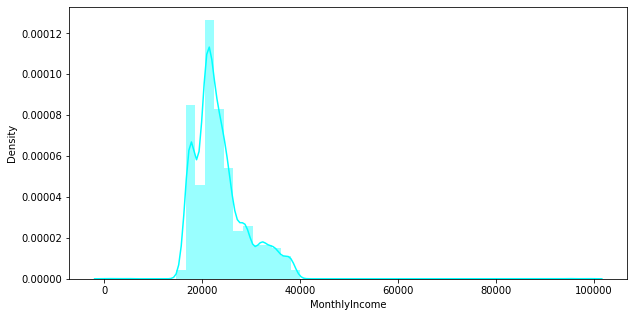

In [25]:
plt.figure(figsize=(10, 5))
sns.distplot(data["MonthlyIncome"], kde=True, color="cyan")
plt.show()

#### Observation
1. The data is normal distribution with a lot of outliers on either sides.So we can impute the missing values with the mean as it is unskewed data.

In [26]:
# Filling the missing values with mean of MonthlyIncome values
data["MonthlyIncome"].fillna(data["MonthlyIncome"].mean(), inplace=True)

## Checking all the columns for missing data again after imputing

In [27]:
# Checking for null values in the data after imputing
data.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

#### Observations
1. All the missing data has been removed.

## Gender Column changing the "Fe male" to "Female"

In [28]:
#Checking the unique value counts in Gender Column
data["Gender"].value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

In [29]:
def fe_male_female(val):
    """
    checks for " " empty space in string
    If there returns Female
    else it returns the string itself
    """
    if isinstance(val,str):
        if " " not in val: #check for " "
            return val
        else:
            return "Female"
        

In [30]:
# Applying the function fe_male_female 
data["Gender"] = data["Gender"].apply(fe_male_female)

In [31]:
data["Gender"].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

#### Observations
1. Gender Column we changed the "Fe male" to "Female".

## MaritalStatus Column changing the "Divorced" and "Single"  to "Unmarried"

In [32]:
#Checking the unique value counts in MaritalStatus Column
data["MaritalStatus"].value_counts()

Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

In [33]:
unmarried= ["Divorced","Single"]
def unmarried_category(val):
    """
    checks for val in string
    If there returns Femaleval is not in unmarried list
    return val
    else return Unmarried
    """
    if isinstance(val,str):
        if val not in unmarried: # check if val in unmarried list
            return val
        else:
            return "Unmarried"
        

In [34]:
# Applying the function unmarried_category 
data["MaritalStatus"] = data["MaritalStatus"].apply(unmarried_category)

In [35]:
data["MaritalStatus"].value_counts()

Unmarried    2548
Married      2340
Name: MaritalStatus, dtype: int64

#### Observations
1. MaritalStatus Column we changed the "Divorced" and "Single" to "Unmarried".

## Designation column recategorizing into Manager and Excecutive

In [36]:
#Checking the unique value counts in Designation Column
data["Designation"].value_counts()

Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64

In [37]:
managers= ["Manager","Senior Manager"]
excecutives = ["Executive","AVP","VP"]
def occupation_category(val):
    """
    checks for val
    If val is in managers list return Managers
    else if val is in returns excecutives list return Executives
    """
    if isinstance(val,str):
        if val in managers: # check for val in manager list
            return "Managers"
        elif val in excecutives: #check for val in Executives list
            return "Executives"

In [38]:
# Applying the function occupation_category 
data["Designation"] = data["Designation"].apply(occupation_category)

In [39]:
data["Designation"].value_counts()

Managers      2474
Executives    2414
Name: Designation, dtype: int64

#### Observations
1.Designation column we recategorized into Manager and Excecutive

## Occupation column recategorizing into Business and Salaried

In [40]:
#Checking the unique value counts in Occupation Column
data["Occupation"].value_counts()

Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

In [41]:
Business= ["Small Business","Large Business","Free Lancer"]
def Business_category(val):
    """
    checks val is not in Business list
    If not return val
    else  returns Business
    """
    if isinstance(val,str):
        if val not in Business: 
            return val
        else:
            return "Business"
        

In [42]:
# Applying the function Business_category 
data["Occupation"] = data["Occupation"].apply(Business_category)

In [43]:
data["Occupation"].value_counts()

Business    2520
Salaried    2368
Name: Occupation, dtype: int64

#### Observations
1. Occupation column we recategorized into Business and Salaried

## Statistical summary of data

In [44]:
# Describes the statistical Summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4888.0,37.622265,9.098418,18.0,31.00,37.0,43.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4888.0,15.362930,8.316166,5.0,9.00,13.0,19.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4888.0,3.711129,0.998271,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4888.0,3.577946,0.797005,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4888.0,3.229746,1.822769,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


### Observations

#### Age
1. The average age of the customers taking the package is 38.
2. The age range varies from 18 to 61.
3. 50% of customers are of 37 years of age.


#### MonthlyIncome	
1. The average MonthlyIncome of the  customers is 23620 per annum.
2. The MonthlyIncome range varies from 1000 to 98678.
3. 50% of customers have about 22655 as MonthlyIncome per annum.

#### DurationOfPitch
1. The mean durationOfPitch of the salesperson to customers is 15.3 mins.
2. The durationOfPitch ranges from 5 mins to 127 mins.
3. 50% of durationOfPitch of salespersons is  13 mins

#### ProdTaken 
1. This is the target variable.


In [45]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Managers,20993.0
1,200001,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Unmarried,2.0,0,3,1,2.0,Managers,20130.0
2,200002,1,37.000000,Self Enquiry,1,8.0,Business,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executives,17090.0
3,200003,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Unmarried,2.0,1,5,1,1.0,Executives,17909.0
4,200004,0,37.622265,Self Enquiry,1,8.0,Business,Male,2,3.0,Basic,4.0,Unmarried,1.0,0,5,1,0.0,Executives,18468.0


In [46]:
val_cols = [
    "CityTier",
    "NumberOfPersonVisiting",
    "NumberOfFollowups",
    "PreferredPropertyStar",
    "NumberOfTrips",
    "Passport",
    "PitchSatisfactionScore",
    "OwnCar",
    "NumberOfChildrenVisiting",
    "TypeofContact",
    "Occupation",
    "Gender",
    "ProductPitched",
    "MaritalStatus",
    "Designation"
    
    
]  # All categorical columns

for i in val_cols:
    print(data[i].value_counts())
    print("\n\n")

1    3190
3    1500
2     198
Name: CityTier, dtype: int64



3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int64



4.0    2113
3.0    1466
5.0     768
2.0     229
1.0     176
6.0     136
Name: NumberOfFollowups, dtype: int64



3.0    3019
5.0     956
4.0     913
Name: PreferredPropertyStar, dtype: int64



2.0     1464
3.0     1219
1.0      620
4.0      478
5.0      458
6.0      322
7.0      218
8.0      105
19.0       1
21.0       1
20.0       1
22.0       1
Name: NumberOfTrips, dtype: int64



0    3466
1    1422
Name: Passport, dtype: int64



3    1478
5     970
1     942
4     912
2     586
Name: PitchSatisfactionScore, dtype: int64



1    3032
0    1856
Name: OwnCar, dtype: int64



1.0    2146
2.0    1335
0.0    1082
3.0     325
Name: NumberOfChildrenVisiting, dtype: int64



Self Enquiry       3469
Company Invited    1419
Name: TypeofContact, dtype: int64



Business    2520
Salaried    2368
Name: Occupation, dtype: int64



Male    

#### Observations
1. Most of the cities the customers belong are Tier 1 cities
2. There are very few customers with 1 extra and 5 extra people accompanying them during the trip.
3. 3 followups and 4 folowups are mostly more in number by the salesperson after their first sales pitch.
4. Most of the customers prefer 3 star hotel for the stay.
5. Most of the customers have done more than 2 trips.
6. Almost half of the customers do not have a passport.
7. Most of the customers do own a car.
8. Many customers have 1 or 2 children with age less than 5 travelling with them.
9. Very few customers have 3 children with age less than 5 travelling with them.
10. Most of the customers are on Self Enquiry Type of Contact.
11. Half of customers are salaried and a little more than half are Business Owners
12. Most of the customers are Male.
13. Many customers have opted for the Basic and duluxe product.
14. There are almost equal customers from the  married and unmarried categorries.
15. There are almost equal customers from the  managers and excecutive categorries.

## Dropping the CustomerID column

In [47]:
# Checking the unique values of CustomerID column
data["CustomerID"].nunique()

4888

#### Observation
1. The CustomerID column is the same as the index of the dataset. hence it is better to drop the column.

In [48]:
# dropping the CustomerID column
data.drop("CustomerID", axis=1, inplace=True)

In [49]:
data.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Managers,20993.0
1,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Unmarried,2.0,0,3,1,2.0,Managers,20130.0
2,1,37.000000,Self Enquiry,1,8.0,Business,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executives,17090.0
3,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Unmarried,2.0,1,5,1,1.0,Executives,17909.0
4,0,37.622265,Self Enquiry,1,8.0,Business,Male,2,3.0,Basic,4.0,Unmarried,1.0,0,5,1,0.0,Executives,18468.0


## Outlier Analysis

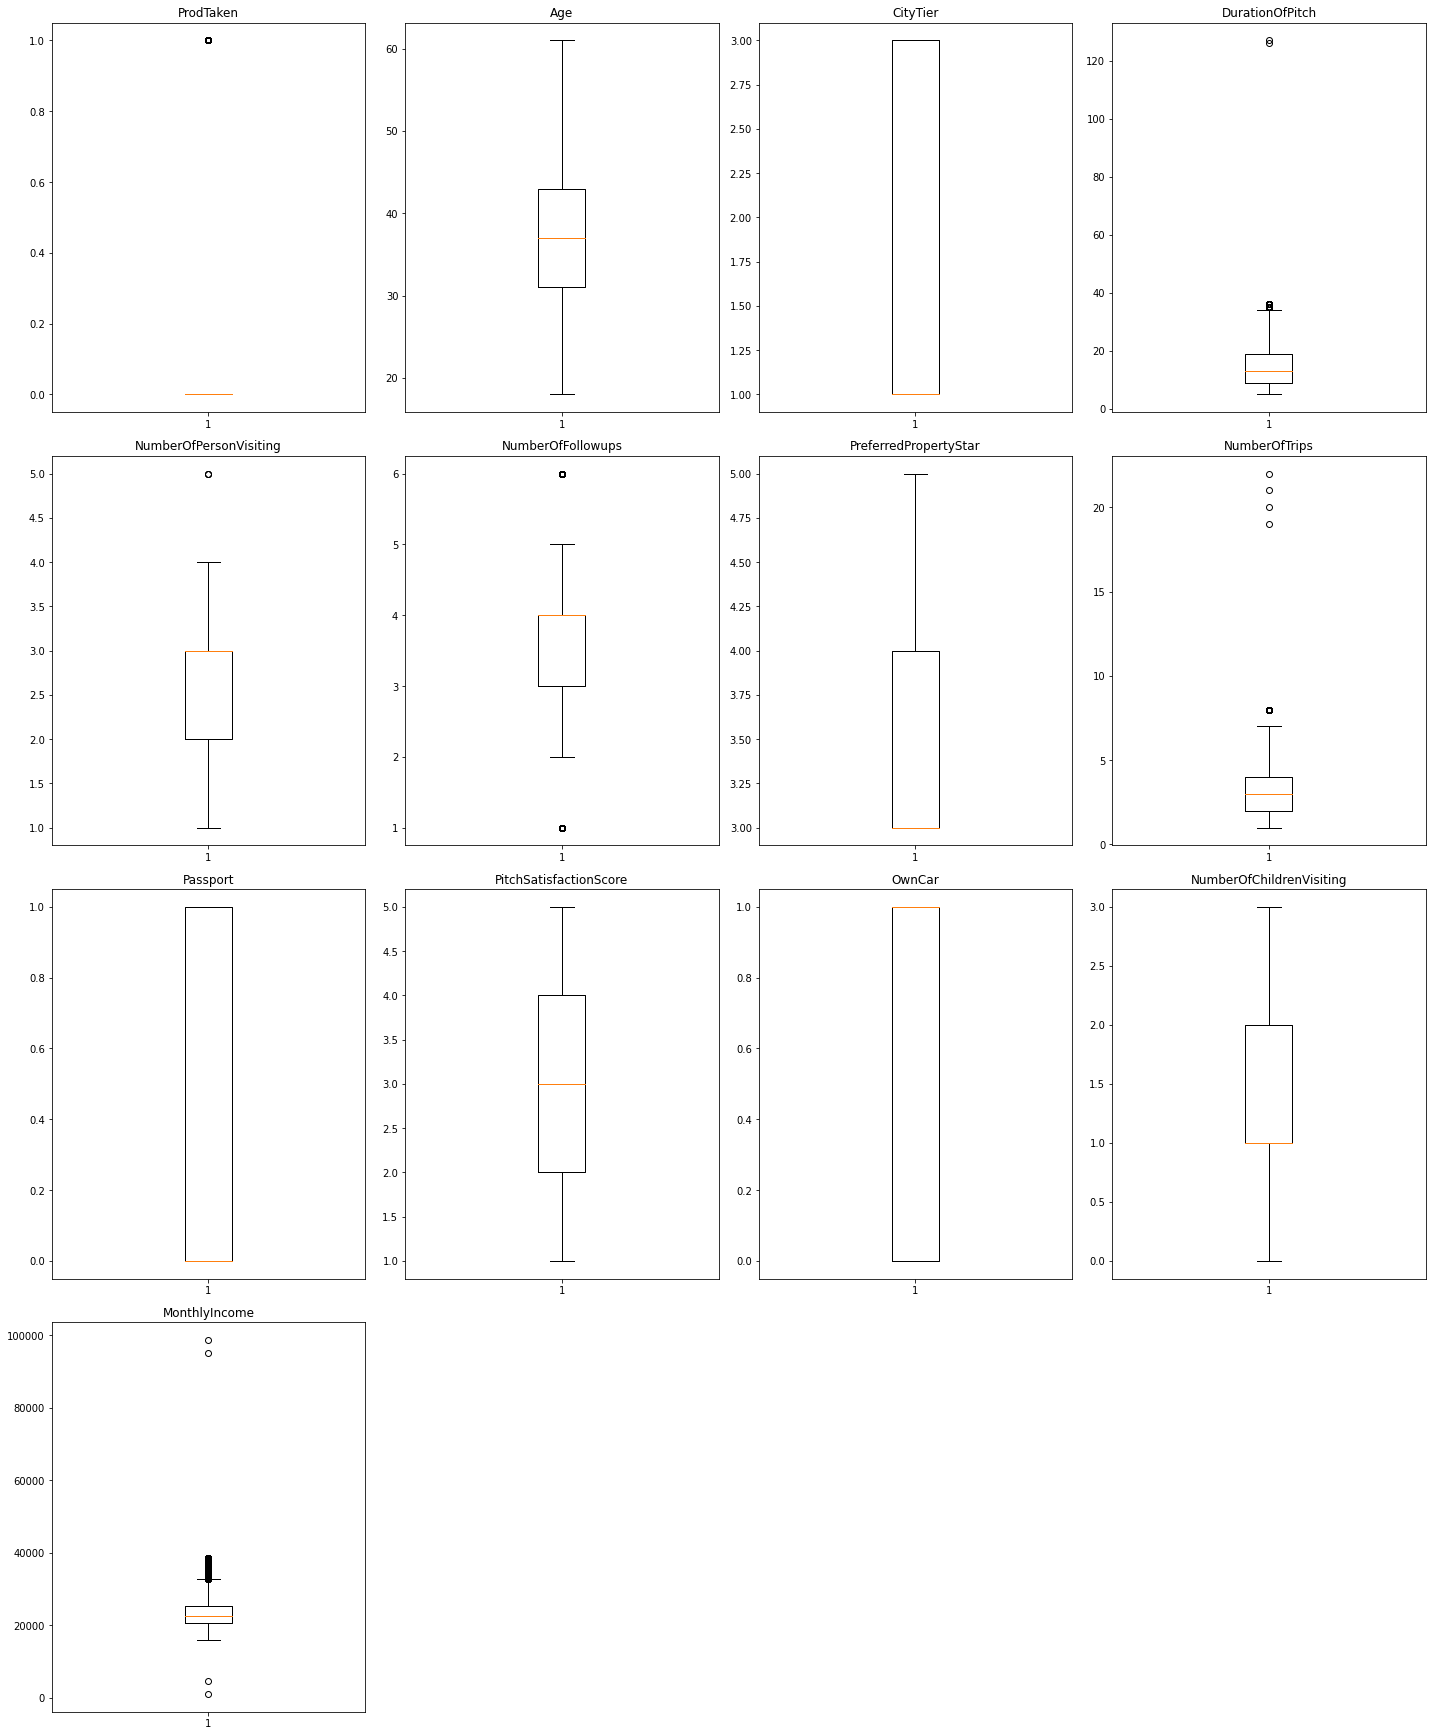

In [50]:
num_cols = data.select_dtypes(include=np.number).columns.to_list() #getting hte numerical columns
plt.figure(figsize=(20,30))

for i, val in enumerate(num_cols):
    plt.subplot(5,4,i+1)
    plt.boxplot(data[val],whis=1.5)# plot box plot
    plt.tight_layout()
    plt.title(val)
plt.show()

#### Observations
1. MonthlyIncome has upper and lower outliers.
2. DurationOfPitch and NumberOfTrips have only upper outliers.
3. Checking in detail for the above 3 outlier analysis.


## Outlier Detection using the IQR method

In [51]:
# Finding the quartiles Q1 ,Q3, IQR and  4IQR
quartiles = np.quantile(data["MonthlyIncome"][data["MonthlyIncome"].notnull()], [0.25, 0.75])
MonthlyIncome_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {MonthlyIncome_4iqr}")
# getting the values
outlier_MonthlyIncome_4iqr = data.loc[
    np.abs(data["MonthlyIncome"] - data["MonthlyIncome"].median()) > MonthlyIncome_4iqr,
    "MonthlyIncome",
]
outlier_MonthlyIncome_4iqr.nunique()

Q1 = 20485.0, Q3 = 25424.75, 4*IQR = 19759.0


3

#### Observations
1. There are 3 observations beyond the 4* times IQR range for the MonthlyIncome Column.
2. All the data are important for the model to make predictions. Hence we will not remove the outliers. They hold valuable informations.

In [52]:
# Finding the quartiles Q1 ,Q3, IQR and  4IQR
quartiles = np.quantile(data["NumberOfTrips"][data["NumberOfTrips"].notnull()],[0.25,0.75])
numberoftrips_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {numberoftrips_4iqr}")
# getting the values
outliers_numberoftrips_4iqr = data.loc[np.abs(data["NumberOfTrips"]-data["NumberOfTrips"].median())> numberoftrips_4iqr,"NumberOfTrips"]
outliers_numberoftrips_4iqr.nunique()

Q1 = 2.0, Q3 = 4.0, 4*IQR = 8.0


4

#### Observations
1. There are 4 observations beyond the 4* times IQR range for the NumberOfTrips Column.
2. All the data are important for the model to make predictions. Hence we will not remove the outliers. They hold valuable informations.

In [53]:
# Finding the quartiles Q1 ,Q3, IQR and  4IQR
quartile = np.quantile(data["DurationOfPitch"][data["DurationOfPitch"].notnull()],[0.25,0.75])
durationofpitch_4iqr  = 4* (quartile[1]-quartile[0])
print(f" Q1 = {quartile[0]} Q3={quartile[1]} 4IQR ={durationofpitch_4iqr}")
# getting the values
outliers_durationofpitch_4iqr= data.loc[np.abs(data["DurationOfPitch"]-data["DurationOfPitch"].median())>durationofpitch_4iqr,"DurationOfPitch"]
outliers_durationofpitch_4iqr.nunique()

 Q1 = 9.0 Q3=19.0 4IQR =40.0


2

#### Observations
1. There are 2 observations beyond the 4* times IQR range for the DurationOfPitch Column.
2. All the data are important for the model to make predictions. Hence we will not remove the outliers. They hold valuable informations.

## tmean Outlier Check

In [54]:
monthlyIncome= data["MonthlyIncome"][data["MonthlyIncome"].notnull()]

from scipy.stats import tmean
# tmean removing tails of the data
print(tmean(monthlyIncome, limits= np.quantile(monthlyIncome,[0.1,0.9])))
# tmean removing tails of the data
print(tmean(monthlyIncome , limits=[0,60000]))

22982.252585878985
23589.88249352696


#### Observations
1. There is a small  change in the tmean for both the analysis in MonthlyIncome column.
2. Hence we will not remove the outliers. They hold valuable informations.

In [55]:
Numberoftrips= data["NumberOfTrips"][data["NumberOfTrips"].notnull()]

from scipy.stats import tmean
# tmean removing tails of the data
print(tmean(Numberoftrips, limits= np.quantile(Numberoftrips,[0.1,0.9])))
# tmean removing tails of the data
print(tmean(Numberoftrips , limits=[0,15]))

2.924577943433458
3.2156019656019654


#### Observations
1. There is a small change in the tmean for both the analysis in NumberOfTrips column.
2. Hence we will not remove the outliers. They hold valuable informations.

In [56]:
Durationofpitch= data["DurationOfPitch"][data["DurationOfPitch"].notnull()]

from scipy.stats import tmean
# tmean removing tails of the data
print(tmean(Durationofpitch, limits= np.quantile(Durationofpitch,[0.1,0.9])))
# tmean removing tails of the data
print(tmean(Durationofpitch , limits=[0,60]))

14.060185185185185
15.317437576749898


#### Observations
1. There is a small change in the tmean for both the analysis in DurationOfPitch column.
2. Hence we will not remove the outliers. They hold valuable informations.

# Data Visualization

In [57]:
def hist_boplot(data,feature,kde=False,bins=None,figsize=(12,7)):
    """
    Returns a histogram and a box plot
    data= data
    features = column
    kde = True/False if we need the density curve
    bin= no of bins for histogram
    fgsize= size of the figure(default 12,7)
    
    """
    f2,(ax_box2,ax_hist2) = plt.subplots(
        nrows=2,# rows for the subplot
        sharex=True,# all the subplots share same x asix
        gridspec_kw ={"height_ratios":(0.25,0.75)},                               
        figsize=figsize)# 2 subplots
    
    sns.boxplot(data=data,
               x=feature,
               showmeans=True,
                ax = ax_box2,
                color="tomato"
               )# a boxplot where the mean is indicated with a star
    sns.histplot(data=data,
            x=feature,ax = ax_hist2,kde=True,bins=bins,color="lime"
                )if bins else sns.histplot(data=data,
            x=feature,ax = ax_hist2,kde=True,color="lime"
    )# plots a histogram
    ax_hist2.axvline(data[feature].mean(),linestyle="--",color="green")# adding mean to histogram
    ax_hist2.axvline(data[feature].median(),linestyle="--",color="blue")# adding median to histogram

In [58]:
# To create a barplot with percentage on top of each
def labelled_bar(data,feature,perc=True,n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    total = data[feature].shape[0]# total values of the columns
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count+1,5))
    else:
        plt.figure(figsize=(n+1,5))
        
    plt.xticks(rotation=90,fontsize=15)
        
    ax = sns.countplot(data=data,
                       x=feature,
                       palette="Paired",
                       order = data[feature].value_counts().index[:n].sort_values()
                      )# create a count plot
    
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
            100 * p.get_height()/total
            )# percentage for each division of the category
            
        else:
            label = p.get_height()
            
        x= p.get_x()+p.get_width()/2# width  of plot
        y= p.get_height() # height of plot
        
        ax.annotate(
            label,
            (x,y),
            size=12,
            xytext=(0,5),
            ha="center",
            va="center",
            textcoords= "offset points"
        )# anootate the percentages
        
    plt.show() # Finally show the plot
            
        

## Univariate Analysis - Numerical data

### Age

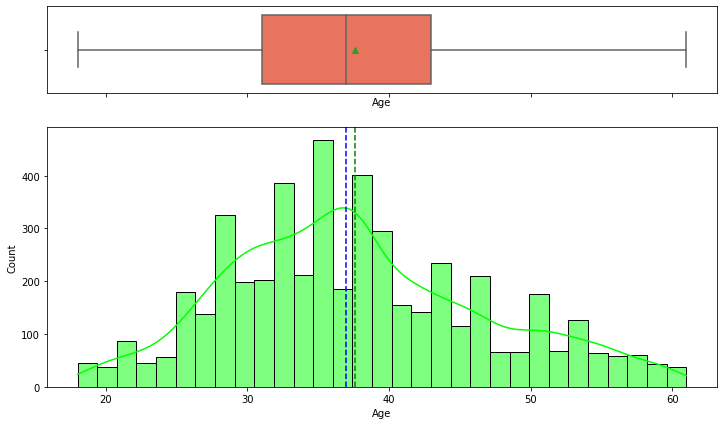

In [59]:
hist_boplot(data,"Age",kde=True)

#### Observations
1. The age column is normally distributed woth a mean of 38.
2. There are no outliers in the data.

### Monthly Income

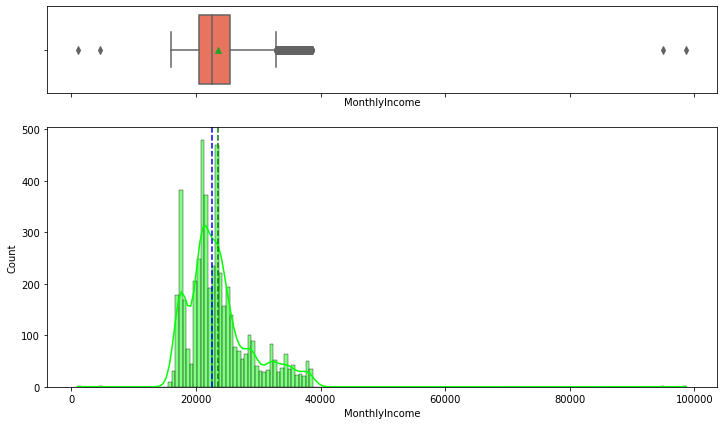

In [60]:
hist_boplot(data,"MonthlyIncome",kde=True)

#### Observations
1. The monthly income is close to normally distributed with a mean of 23620.
2. There are many outliers in the data but we will not be removing them as they have valuable informations.

### Duration Of pitch 

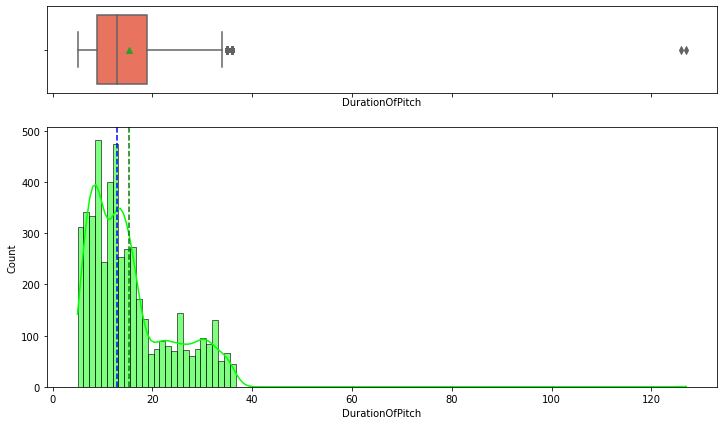

In [61]:
hist_boplot(data,"DurationOfPitch",kde=True)

#### Observations
1. The data distribution for DurationOfPitch is right skewed.
2. There are outliers present but we will not be removing them as they hold valuable information.

## Univariate Analysis - Categorical Data

### CityTier

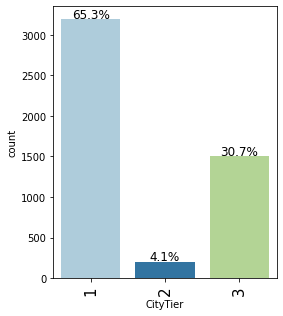

In [62]:
labelled_bar(data,"CityTier",perc=True)

#### Observations
1. 65.3% of customers live in Tier 1 cities.
2. 30.7% live in Tier 3 cities.
3. Only 4.1% of customers live in Tier 2 cities.

### NumberOfPersonVisiting

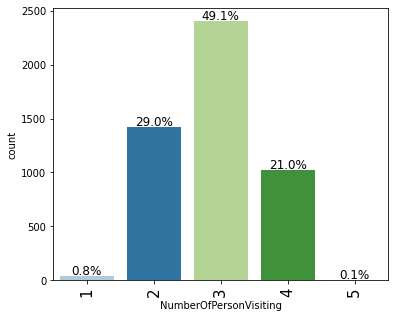

In [63]:
labelled_bar(data,"NumberOfPersonVisiting",perc=True)

#### Observations
1. 49.1%  travel in  groups of 3 along with the customer for their trips.
2. 29 % travel in  groups of 2 along with the customer for their trips.
3. 21% travel in  groups of 4 along with the customer for their trips.
4. Less than 1% travel with extra one person.
5. Very few customers travel as 5 memebers for their trips.

### NumberOfFollowups

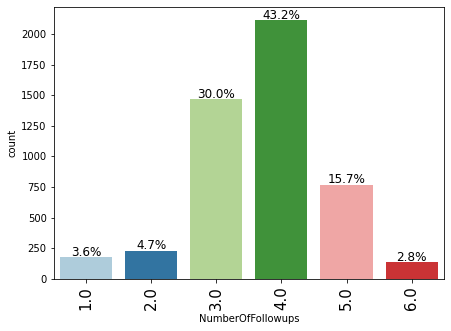

In [64]:
labelled_bar(data,"NumberOfFollowups",perc=True)

#### Observations
1. Of the total number of followups, 43.2% accounts to 4 times follow up  done by the Salesperson after their first pitch.
2. Of the total number of followups 30% accounts to 3 times follow up  done by the Salesperson after their first pitch.
3. Of the total number of followups 15.7% accounts to 5 times follow up  done by the Salesperson after their first pitch.
4. Of the total number of followups less than 5% accounts to 1 and 2 and 6 times follow up  done by the Salesperson after their first pitch.

### PreferredPropertyStar

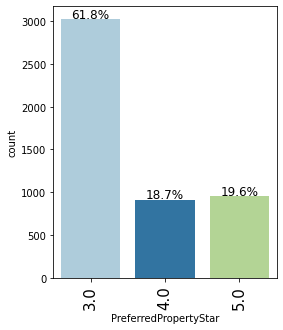

In [65]:
labelled_bar(data,"PreferredPropertyStar",perc=True)

#### Observations
1. 61.8% of customers prefer 3 star hotel to stay in.
2. 19.6% of customers prefer 5 star accomodation.
3. 18.7% of customers prefer 4 star accomodation.

### NumberOfTrips

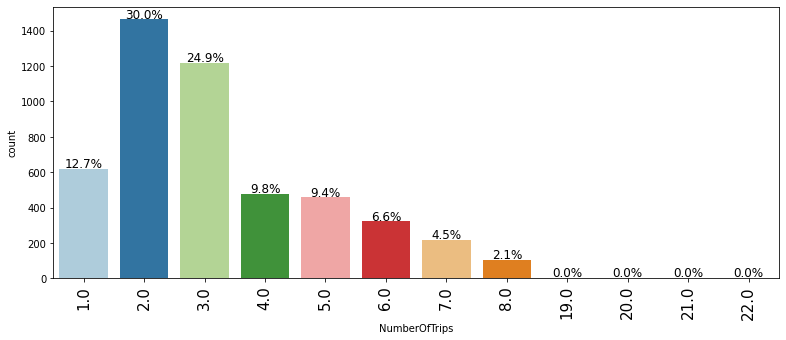

In [66]:
labelled_bar(data,"NumberOfTrips",perc=True)

#### Observations
1. 30% of customers have done 2 trips in a year with "Visit With Us".
2. 24.9% of customers have done 3 trips in a year with "Visit With Us".
3. 12.7 of customers have done 1 trip in a year with "Visit With Us".
4. 10% of customers have done 4 trips and 9.4% have done 5 trips with "Visit With Us".
5. 6.6% have done 6 trips and 4.5% f customers have done 7 trips with "Visit With Us".
6. It is surprising to see 2.1% of customers have done 8 trips in a year with "Visit With Us".


### Passport

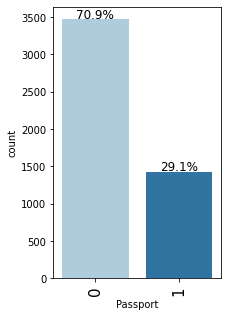

In [67]:
labelled_bar(data,"Passport",perc=True)

#### Observations
1. 70.9% of customers do not have a passport.
2. Only 29.1% of customers have a passport.

### PitchSatisfactionScore

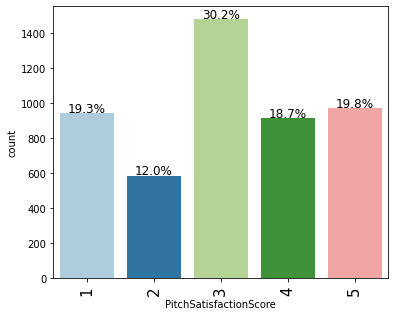

In [68]:
labelled_bar(data,"PitchSatisfactionScore",perc=True)

#### Observations
1. 30.2% of customers have given a PitchSatisfactionScore of 3.
2. 19.8% of customers have given a PitchSatisfactionScore of 5.
3. 19.3% of customers have given a PitchSatisfactionScore of 1.
4. 18.7% of customers have given a PitchSatisfactionScore of 4.
5. 12% of customers have given a PitchSatisfactionScore of 2.

### OwnCar

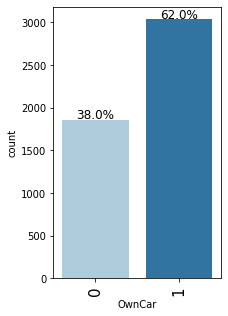

In [69]:
labelled_bar(data,"OwnCar",perc=True)

#### Observations
1. 62% of customers own a car.
2. 38% do not own a car.

### NumberOfChildrenVisiting

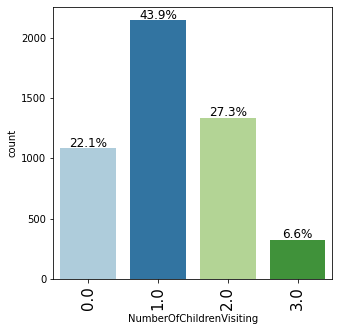

In [70]:
labelled_bar(data,"NumberOfChildrenVisiting",perc=True)

#### Observations
1. 43.9% of customers have 1 child of age less than 5 travelling with them.
2. 27.3% of customers have 2 children of age less than 5 travelling with them.
3. 22.1% of customers have no children of age less than 5 travelling with them.
4. Only 6.6% of customers have 3 children of age less than 5 travelling with them.

### TypeofContact

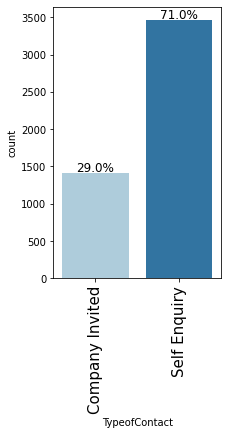

In [71]:
labelled_bar(data,"TypeofContact",perc=True)

#### Observations
1. 71% of customers were contacted by self enquiry.
2. 29% of customers were contacted by companyInvited type of contact.

### Occupation

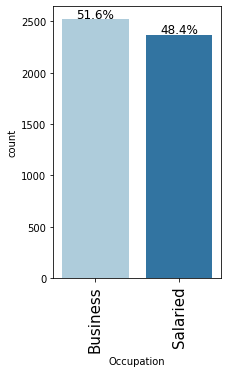

In [72]:
labelled_bar(data,"Occupation",perc=True)

#### Observations
1. 51.6% of customers have their own business.
2. 48.4% of customers are salaried people.

### Gender

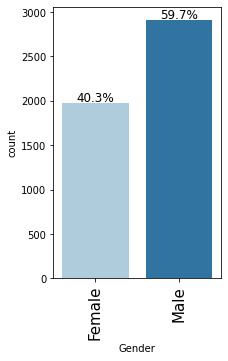

In [73]:
labelled_bar(data,"Gender",perc=True)

#### Observations
1. 59.7& of the customers are male.
2. 40.3% of customers are females.

### ProductPitched

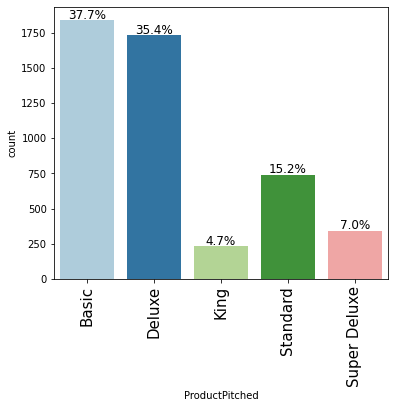

In [74]:
labelled_bar(data,"ProductPitched",perc=True)

#### Observations
1. 37.7% of customers were pitched with the basic tour package by the salesperson.
2. 35.4% of customers were pitched with the Deluxe tour package by the salesperson.
3. 15.2% of customers were pitched with the Standard tour package by the salesperson.
4. 7% of customers were pitched with the Super Deluxe tour package by the salesperson.
5. 4.7% of customers were pitched with the King tour package by the salesperson.

### MaritalStatus

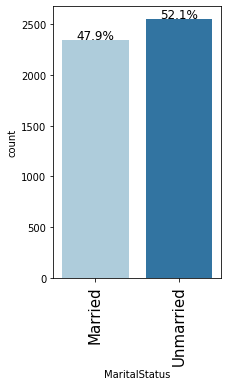

In [75]:
labelled_bar(data,"MaritalStatus",perc=True)

#### Observations
1. 52.1% of the customers are unmarried.
2. 47.9% of the customers are married.

### Designation

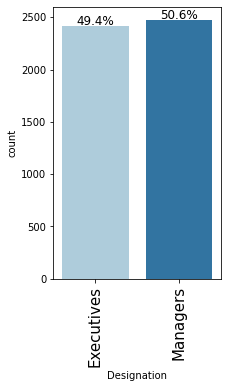

In [76]:
labelled_bar(data,"Designation",perc=True)

#### Observations
1. 50.6% of customers are Managers by profession.
2. 49.4% of customers are Excecutives by profession.

### ProdTaken

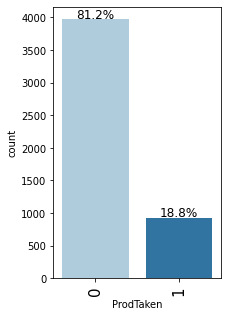

In [77]:
labelled_bar(data,"ProdTaken",perc=True)

#### Observations
1. This is the target variable.
2. 81.2% of customers have not purchased the product.
3. Only 18.8% of customers have purchased the product 

## Bivariate Analysis

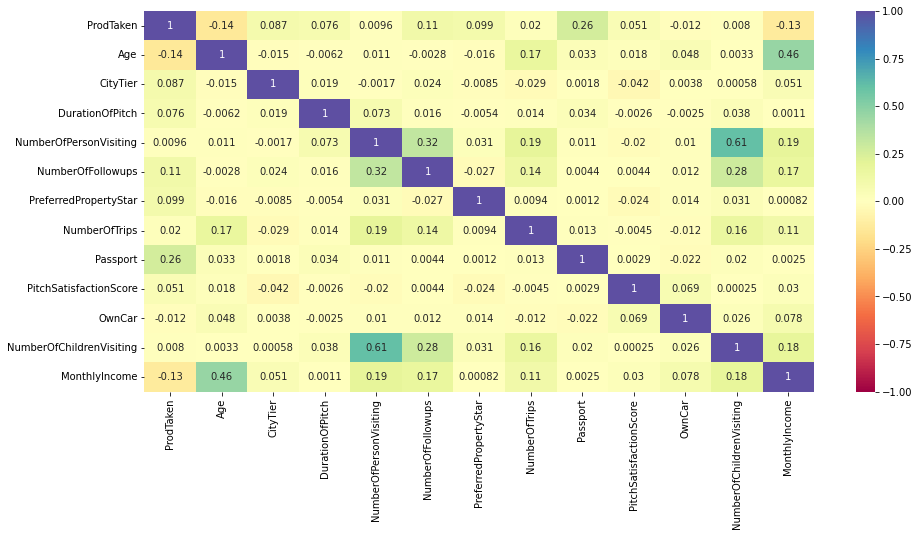

In [78]:
# used to create a heatmap.
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

#### Observations
1. NumberOfPersonVisiting and NumberOfChildrenVisiting have a positive correlation of 0.61
2. Age and Monthly Income have a positive correlation of 0.46
3. NumberOfFollowups and NumberOfPersonVisiting have a positive correlation of 0.32
4. ProdTaken and Passport have a positive correlation of 0.26
5. ProdTaken is  positively correlated (with a small correlation value) with MonthlyIncome, NumberOfChildrenVisiting, OwnCar, PitchSatisfactionScore, NumberOfTrips, PreferredPropertyStar,
NumberOfFollowups, NumberOfPersonVisiting, Durationofpitch and CityTier.
6. ProdTaken is negatively correlated with Age.


## Pairplot Analysis

In [79]:
# # plot pair plots with ProdTaken as hue
# sns.pairplot(data=data, hue="ProdTaken")
# plt.show()

#### Observations
1. We can see varying distributions in variables for ProdTaken, we should investigate it further.

## Mutivariate Analysis

## Stacked Bar Chart

In [80]:
def stacked_bar(data,predictor,target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    
    tab1= pd.crosstab(data[predictor],data[target],margins=True).sort_values(by=sorter,ascending=False)
    print(tab1)
    print("\n\n")
    
    tab= pd.crosstab(data[predictor],data[target],normalize="index").sort_values(by=sorter,ascending=False)
    tab.plot(kind="bar",stacked=True,figsize=(count+5,6))
    plt.legend(loc="lower left",frameon=False)
    plt.legend(loc="upper left",bbox_to_anchor=(1,1))
    plt.show()

In [81]:
def distribution_wrt_target(data,predictor,target):
    """
    returns 2 box and 2 hist plots
    wrt Target
    data :dataset
    predictor:independant variable
    target:dependant variable
    """
    
    fg, axs = plt.subplots(2,2,figsize=(12,7))
    target_unique = data[target].unique()
    
    axs[0,0].set_title("Distribution wrt target" + str(target_unique[0]))
    sns.histplot(data=data[data[target]== target_unique[0]],
                x=predictor,
                kde=True,
                 stat="density",
                color="magenta",
                ax=axs[0,0])
    
    axs[0,1].set_title("Distribution wrt target" + str(target_unique[1]))
    sns.histplot(data=data[data[target]== target_unique[1]],
                x=predictor,
                kde=True,
                 stat="density",
                color="turquoise",
                ax=axs[0,1])
    
    axs[1,0].set_title("Boxplot wrt target")
    sns.boxplot(data=data,
               x=target,
               y=predictor,
               palette="gist_rainbow",
               ax=axs[1,0])
    
    axs[1,1].set_title("Boxplot wrt target without outliers")
    sns.boxplot(data=data,
               x=target,
               y=predictor,
               showfliers=False,
               palette="gist_rainbow",
               ax=axs[1,1])
    
    plt.tight_layout()
    plt.show()

## Age W.R.T ProdTaken

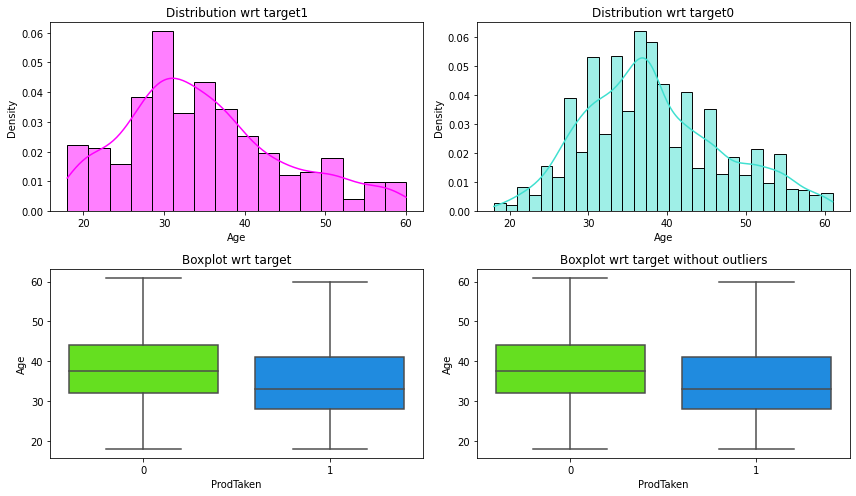

In [82]:
distribution_wrt_target(data,"Age","ProdTaken")

#### Observations
1. Customers who have taken the package have a median age between 30-34.

## DurationOfPitch W.R.T ProdTaken

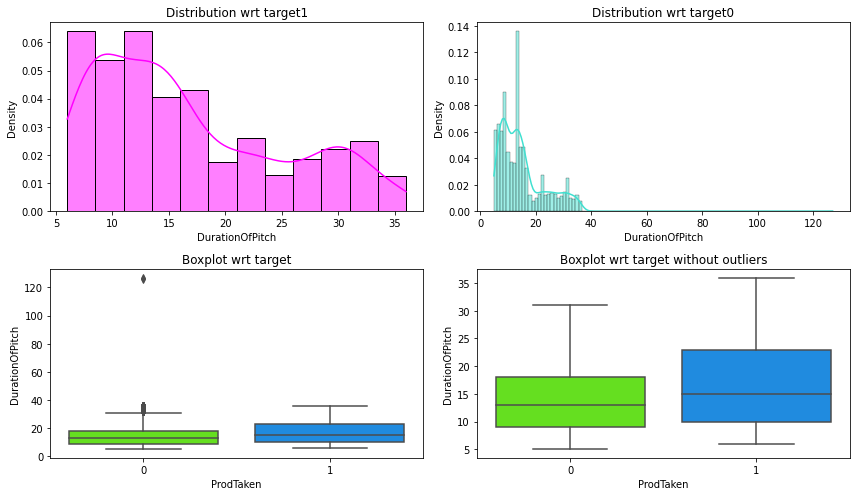

In [83]:
distribution_wrt_target(data,"DurationOfPitch","ProdTaken")

#### Observation
1. Customers who have taken the package have a median  DurationOfPitch of 15 mins.
2. Higher the DurationOfPitch more likely is a customer to take the tour package

## MonthlyIncome W.R.T ProdTaken

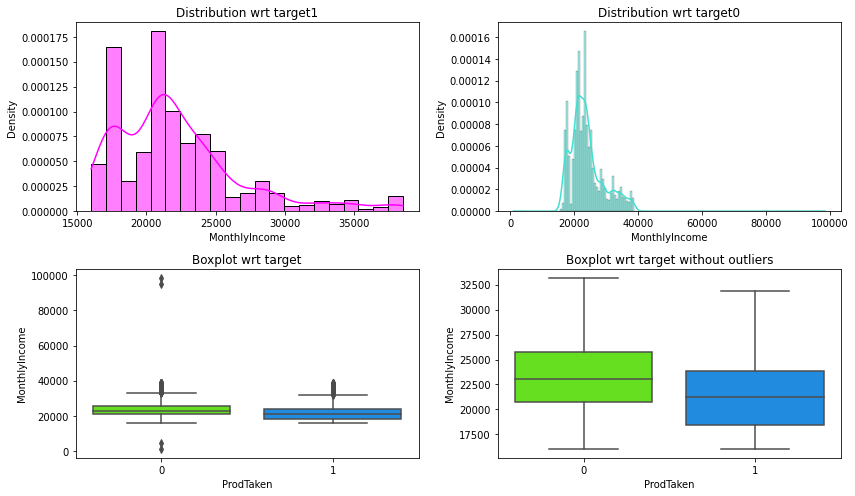

In [84]:
distribution_wrt_target(data,"MonthlyIncome","ProdTaken")

#### Observations
1. Customers who have taken the package have a median MonthlyIncome range between 20000-22500.
2. The more the income customers are not willing to take tour packages.

In [85]:
data.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

## TypeofContact W.R.T ProdTaken

ProdTaken           0    1   All
TypeofContact                   
All              3968  920  4888
Self Enquiry     2859  610  3469
Company Invited  1109  310  1419





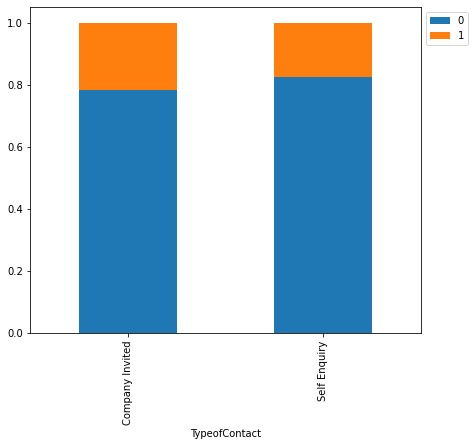

In [86]:
stacked_bar(data,"TypeofContact","ProdTaken")

#### Observations
1. Customers with a Company Invitation have mostly taken the Tour package.

## CityTier W.R.T ProdTaken

ProdTaken     0    1   All
CityTier                  
All        3968  920  4888
1          2670  520  3190
3          1146  354  1500
2           152   46   198





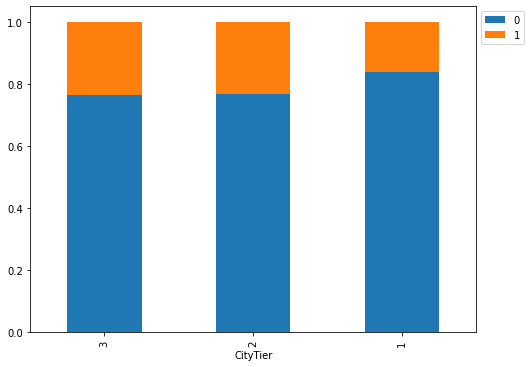

In [87]:
stacked_bar(data,"CityTier","ProdTaken")

#### Observations
1. Customers from Tier 2 and Tier 3 Cities have taken more of the tour packages.

## Occupation W.R.T ProdTaken

ProdTaken      0    1   All
Occupation                 
All         3968  920  4888
Business    2014  506  2520
Salaried    1954  414  2368





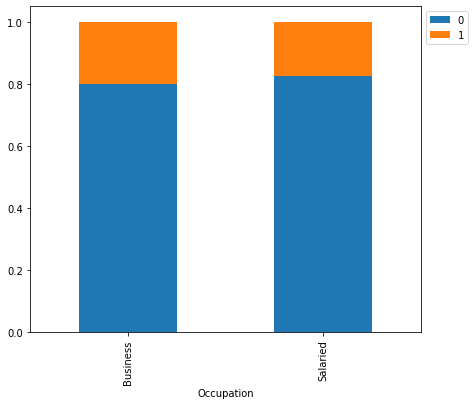

In [88]:
stacked_bar(data,"Occupation","ProdTaken")

#### Observations
1. Customers having their own business have taken more of the tour packages than salaried people.

## Gender W.R.T ProdTaken

ProdTaken     0    1   All
Gender                    
All        3968  920  4888
Male       2338  578  2916
Female     1630  342  1972





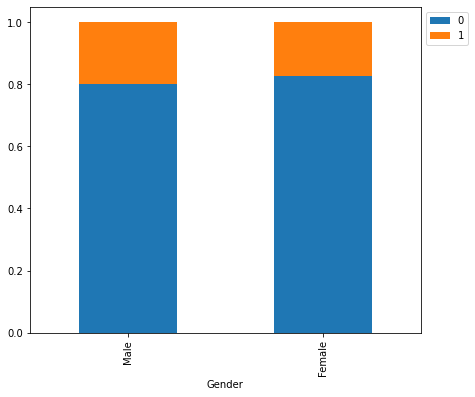

In [89]:
stacked_bar(data,"Gender","ProdTaken")

#### Observations
1. Both male and female Customers have more or less equally taken the tour packages.

## NumberOfPersonVisiting W.R.T ProdTaken

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
All                     3968  920  4888
3                       1942  460  2402
2                       1151  267  1418
4                        833  193  1026
1                         39    0    39
5                          3    0     3





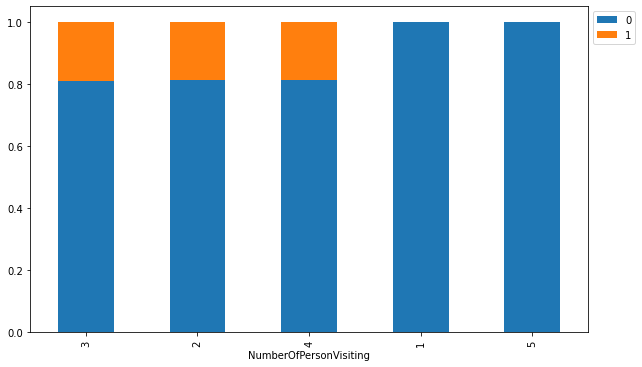

In [90]:
stacked_bar(data,"NumberOfPersonVisiting","ProdTaken")

#### Observations
1. Customers with total of 2 or 3 or 4 people together going on a trip have mostly taken the tour package.

## NumberOfFollowups W.R.T ProdTaken

ProdTaken             0    1   All
NumberOfFollowups                 
All                3968  920  4888
4.0                1726  387  2113
3.0                1222  244  1466
5.0                 577  191   768
6.0                  82   54   136
2.0                 205   24   229
1.0                 156   20   176





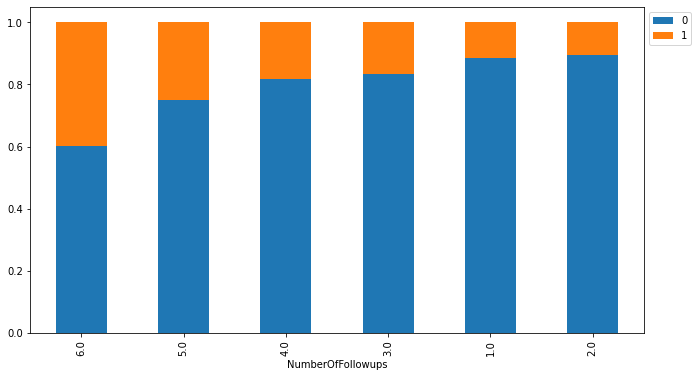

In [91]:
stacked_bar(data,"NumberOfFollowups","ProdTaken")

#### Observations
1. With 6 or 5 followups there are high changes of customer taking the tour package.


## NumberOfFollowups W.R.T ProdTaken

ProdTaken          0    1   All
ProductPitched                 
All             3968  920  4888
Basic           1290  552  1842
Deluxe          1528  204  1732
Standard         618  124   742
King             210   20   230
Super Deluxe     322   20   342





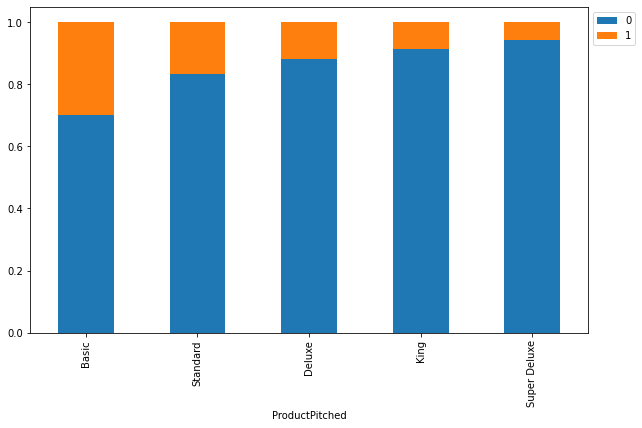

In [92]:
stacked_bar(data,"ProductPitched","ProdTaken")

#### Observations
1. Mostly customers have taken the Basic package followed by Standard package.

## PreferredPropertyStar W.R.T ProdTaken

ProdTaken                 0    1   All
PreferredPropertyStar                 
All                    3968  920  4888
3.0                    2531  488  3019
5.0                     706  250   956
4.0                     731  182   913





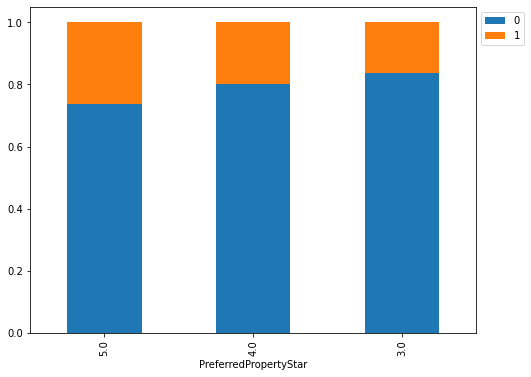

In [93]:
stacked_bar(data,"PreferredPropertyStar","ProdTaken")

#### Observations
1. Mostly customers have a property preference of 5 star and 4 star who have taken the product.

## MaritalStatus W.R.T ProdTaken

ProdTaken         0    1   All
MaritalStatus                 
All            3968  920  4888
Unmarried      1954  594  2548
Married        2014  326  2340





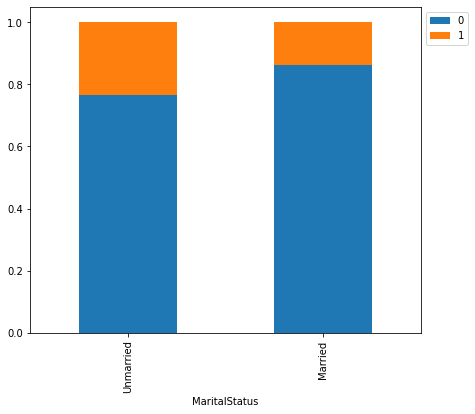

In [94]:
stacked_bar(data,"MaritalStatus","ProdTaken")

#### Observations
1. Customers who are mostly unmarried have taken the tour package than married customers.

## NumberOfTrips W.R.T ProdTaken

ProdTaken         0    1   All
NumberOfTrips                 
All            3968  920  4888
2.0            1165  299  1464
3.0             990  229  1219
1.0             508  112   620
6.0             258   64   322
5.0             396   62   458
7.0             156   62   218
4.0             417   61   478
8.0              76   29   105
19.0              0    1     1
20.0              0    1     1
21.0              1    0     1
22.0              1    0     1





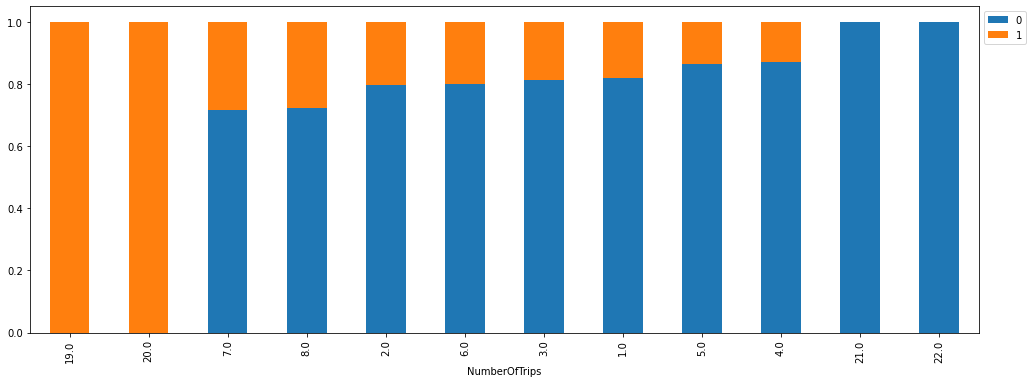

In [95]:
stacked_bar(data,"NumberOfTrips","ProdTaken")

#### Observations
1. For an analysis customers with 7-8  trips per year previously are more likely to take the tour packages.
2. Customers with 1-6 per year trips previously are also more likely to take the tour packages.
3. It is surprising to see customers with 19 and 20 trips per year have also opted to take the tour package once more.

## Passport W.R.T ProdTaken

ProdTaken     0    1   All
Passport                  
All        3968  920  4888
1           928  494  1422
0          3040  426  3466





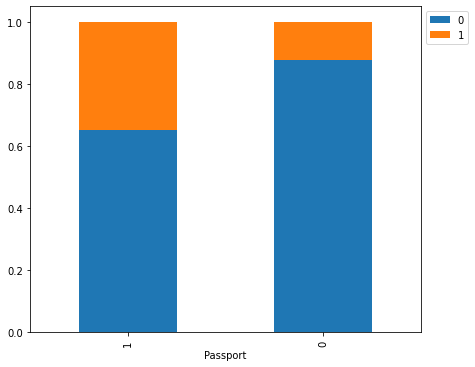

In [96]:
stacked_bar(data,"Passport","ProdTaken")

#### Observations
1. Customers who have a passport mostly have taken the tour package.

## PitchSatisfactionScore W.R.T ProdTaken

ProdTaken                  0    1   All
PitchSatisfactionScore                 
All                     3968  920  4888
3                       1162  316  1478
5                        760  210   970
4                        750  162   912
1                        798  144   942
2                        498   88   586





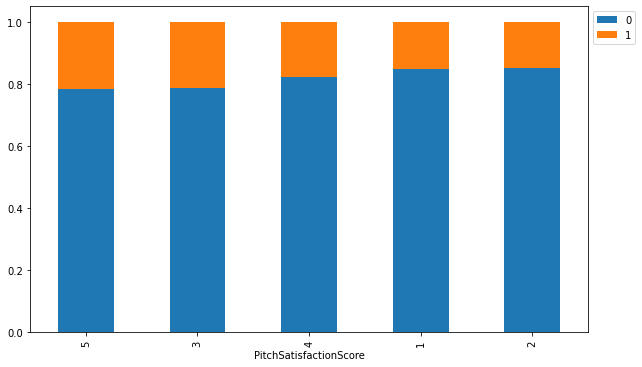

In [97]:
stacked_bar(data,"PitchSatisfactionScore","ProdTaken")

#### Observations
1. Customers who have a PitchSatisfactionScore of 3 or 4 or 5 are most likely to take the tour package.

## OwnCar W.R.T ProdTaken

ProdTaken     0    1   All
OwnCar                    
All        3968  920  4888
1          2472  560  3032
0          1496  360  1856





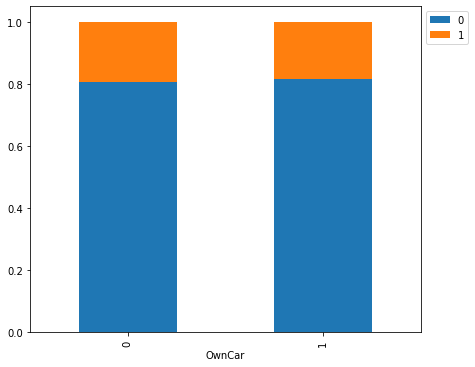

In [98]:
stacked_bar(data,"OwnCar","ProdTaken")

#### Observations
1. Both customers owning and not owning a car have more or less equally taken the tour package.

## NumberOfChildrenVisiting W.R.T ProdTaken

ProdTaken                    0    1   All
NumberOfChildrenVisiting                 
All                       3968  920  4888
1.0                       1747  399  2146
2.0                       1082  253  1335
0.0                        880  202  1082
3.0                        259   66   325





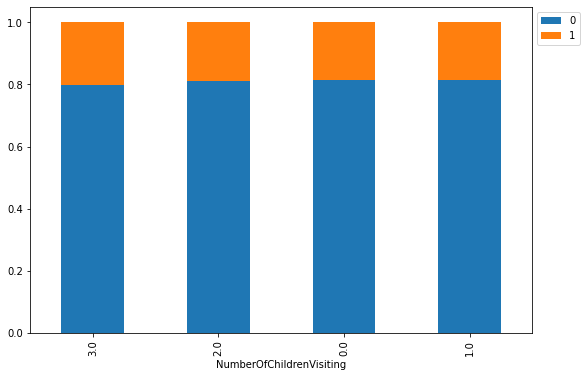

In [99]:
stacked_bar(data,"NumberOfChildrenVisiting","ProdTaken")

#### Observations
1. With no children to about 3 childeren of age less than 5 accompanying the customers  all have taken the tour package

## Designation W.R.T ProdTaken

ProdTaken       0    1   All
Designation                 
All          3968  920  4888
Executives   1822  592  2414
Managers     2146  328  2474





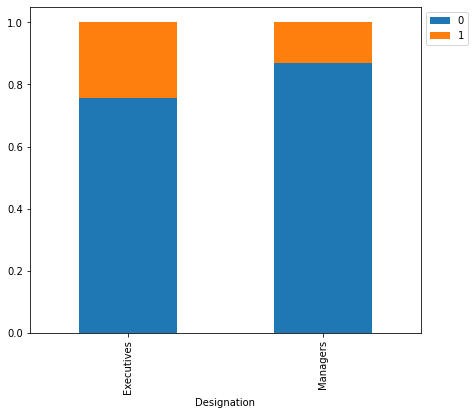

In [100]:
stacked_bar(data,"Designation","ProdTaken")

#### Observations
1. Excecutives are more likely to take the tour package than the Managers.

## Questions regarding the Business

## How ProductPitched varies with MonthlyIncome across ProdTaken

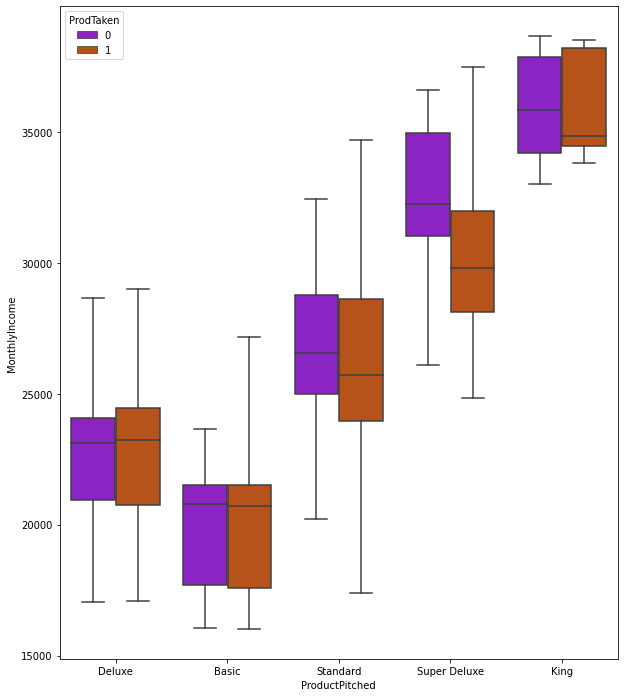

In [101]:
# lets see how experience varies
plt.figure(figsize=(10, 12))
sns.boxplot(
    y="MonthlyIncome", x="ProductPitched", data=data, hue="ProdTaken", showfliers=False,palette="gnuplot"
)
plt.show()

#### Observations
1. Customers with a median salary range between 34000-35000 and tried the King package will most likely take the tour package.
2. Customers with a median salary range between 29000-30000 and tried the Super Deluxe package will most likely take the tour package.
3. Customers with a median salary range between 26000-27000 and tried the STandard package will most likely take the tour package.
4. Customers with a median salary range between 21000-22000 and tried the Basic package will most likely take the tour package.
5. Customers with a median salary range between 23000-24000 and tried the Deluxe package will most likely take the tour package.

## How ProductPitched varies with DurationOfPitch across ProdTaken

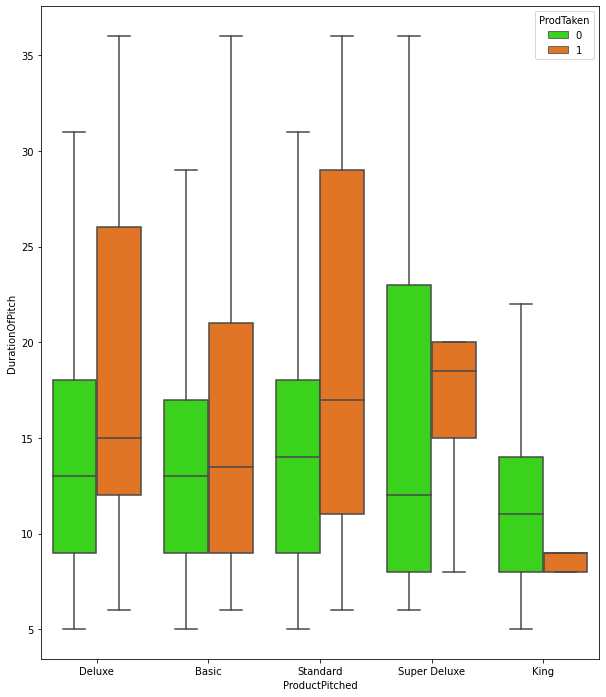

In [102]:
plt.figure(figsize=(10, 12))
sns.boxplot(
    y="DurationOfPitch", x="ProductPitched", data=data, hue="ProdTaken", showfliers=False,palette="gist_ncar"
)
plt.show()

#### Observations
1. Customers with standard and Deluxe package and having a higher DurationOfPitch  median range of 15-15.5 mins are more likely take a tour package.
2. Customers with SUper Deluxe and having a higher DurationOfPitch median of range 16-20 mins are more likely to  take a tour package.
3. Customers with Basic package having a median range DurationOfPitch betweem 13.5-15 mins more lkely take the tour package.

## How ProductPitched varies with Age across ProdTaken

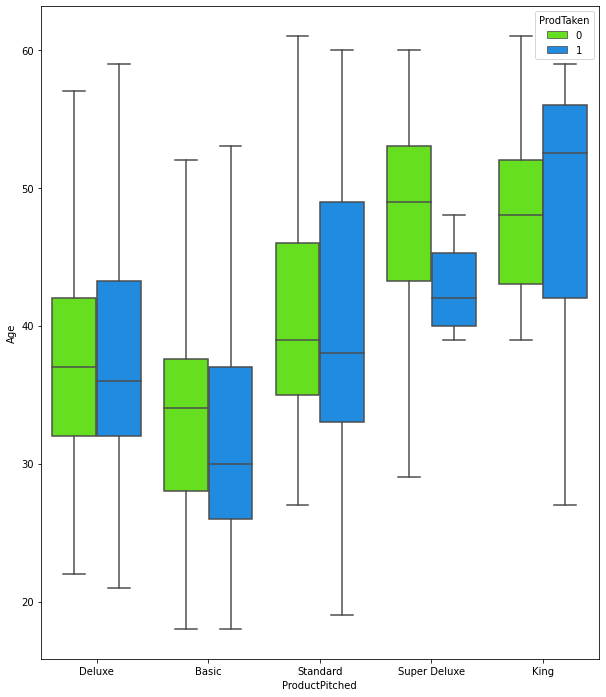

In [103]:
plt.figure(figsize=(10, 12))
sns.boxplot(
    y="Age", x="ProductPitched", data=data, hue="ProdTaken", showfliers=False,palette="gist_rainbow"
)
plt.show()

#### Observations
1. Customers with median age between  52-55 with the  King package mostly will choose a tour package.
2. Customers with median age between  40-45 with the  Super Deluxe package mostly will choose a tour package.
3. Customers with median age between  37-45 with the  Standard package mostly will choose a tour package.
4. Customers with median age between  30-35 with the  Basic package mostly will choose a tour package.
5. Customers with median age between  35-42 with the  Deluxe package mostly will choose a tour package.

## How ProductPitched varies with DurationOfPitch across ProdTaken

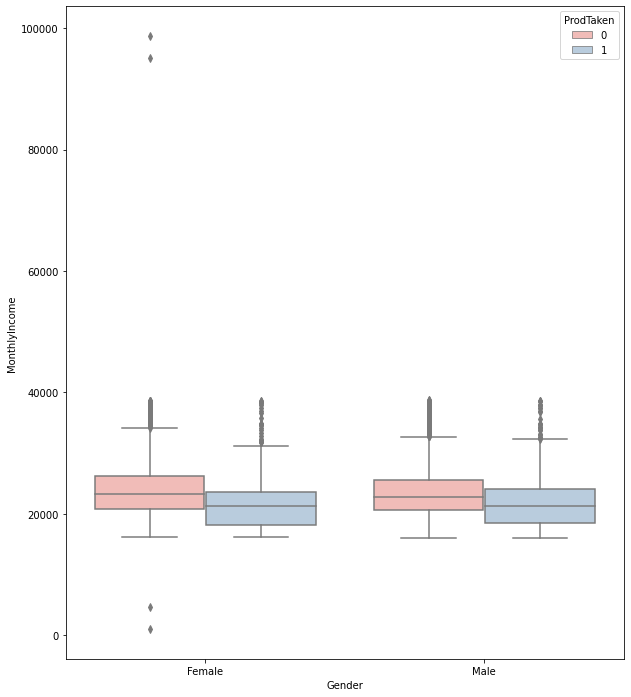

In [104]:
# lets see how experience varies
plt.figure(figsize=(10, 12))
sns.boxplot(
    y="MonthlyIncome", x="Gender", data=data,hue="ProdTaken",palette="Pastel1"
)
plt.show()

#### Observations
1. Male customers earning with a median range between 20000-23000 will take the tour package.
2. Female customers earning with a median range between 24000-25000 will take the tour package.

## How Occupation varies with DurationOfPitch across ProdTaken

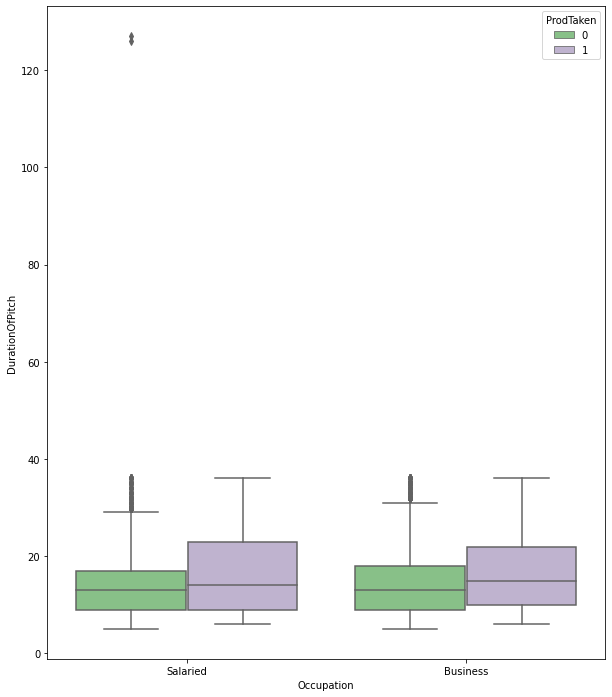

In [105]:
# lets see how experience varies
plt.figure(figsize=(10, 12))
sns.boxplot(
    y="DurationOfPitch", x="Occupation", data=data,hue="ProdTaken",palette="Accent"
)
plt.show()

#### Observations
1. Business Customers with a DurationOfPitch median range between 15-18 mins mostly will take the tour package.
3. Salaried Customers with a DurationOfPitch median range between 13-15 mins mostly will take the tour package.

## How TypeofContact varies with DurationOfPitch across ProdTaken

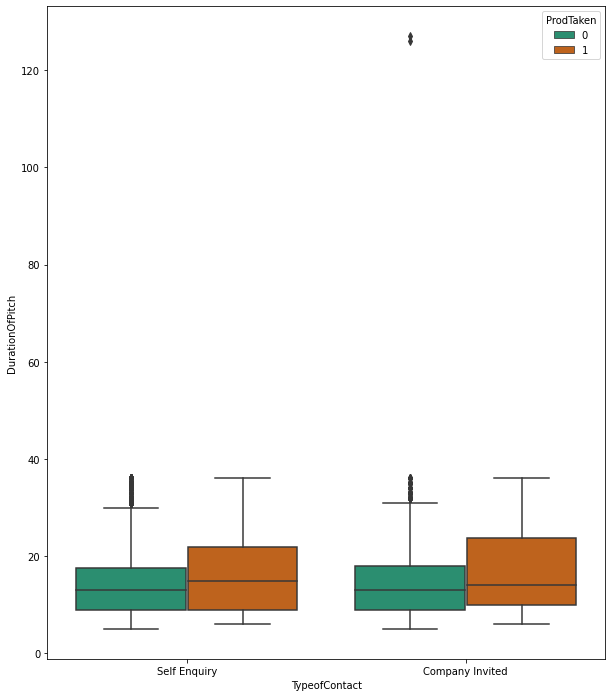

In [106]:
plt.figure(figsize=(10, 12))
sns.boxplot(
    y="DurationOfPitch", x="TypeofContact", data=data,hue="ProdTaken",palette="Dark2"
)
plt.show()

#### Observations
1. Customers who are Company Invited and have a DurationOfPitch median of range 10-15 mins mostly will take the tour package.
2. Customers who come through Self Enquiry and have a DurationOfPitch median of range 16-18 mins mostly will take the tour package.

## How MaritalStatus varies with DurationOfPitch across ProdTaken

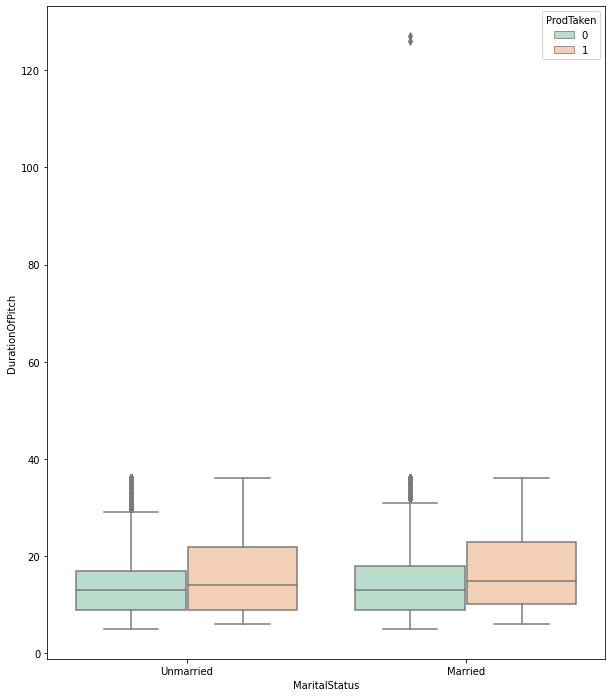

In [107]:
plt.figure(figsize=(10, 12))
sns.boxplot(
    y="DurationOfPitch", x="MaritalStatus", data=data,hue="ProdTaken",palette="Pastel2"
)
plt.show()

#### Observations
1. Married CUstomers with median  DurationOfPitch range between 15-18 mins mostly will take the tour package.
1. Unmarried CUstomers with median  DurationOfPitch range between 11-15 mins mostly will take the tour package.


## How MonthlyIncome varies with Designation across ProdTaken

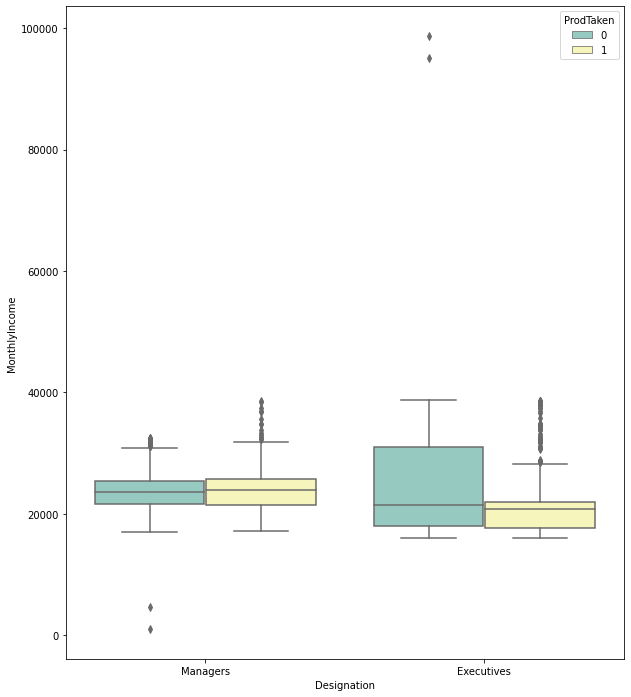

In [108]:
plt.figure(figsize=(10, 12))
sns.boxplot(
    y="MonthlyIncome", x="Designation", data=data,hue="ProdTaken",palette="Set3"
)
plt.show()

#### Observations
1. Excecutives with a median monthly income range of 21000-23000  mostly will take the tour package.
2. Managers with a median monthly income range of 24000-26000  mostly will take the tour package.

## How PitchSatisfactionScore varies with DurationOfPitch 

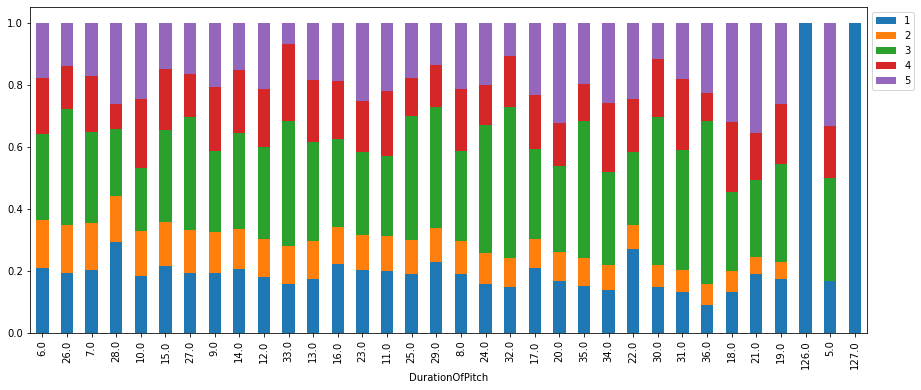

In [109]:
sorter = data["PitchSatisfactionScore"].value_counts().index[-1]
tab = pd.crosstab(data["DurationOfPitch"], data["PitchSatisfactionScore"], normalize="index").sort_values(
        by=sorter, ascending=False
    )
tab.plot(kind="bar", stacked=True, figsize=(10
                                            + 5, 6))
plt.legend(loc="lower left", frameon=False)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

#### Observations
1. DurationOfPitch of 5 mins, 21 mins and  20 mins have the highest PitchSatisfactionScore of 5 which will lead to strongest conversion
2. DurationOfPitch of 126 mins,127mins, 28 mins , 22 mins have the lowest PitchSatisfactionScore of 1 which will lead to weakest conversion.
3. DurationOfPitch of 32 mins, 30 mins and 36 mins  have a middle PitchSatisfactionScore of 3 which will lead to moderate conversion.


## How NumberOfFollowups varies with DurationOfPitch

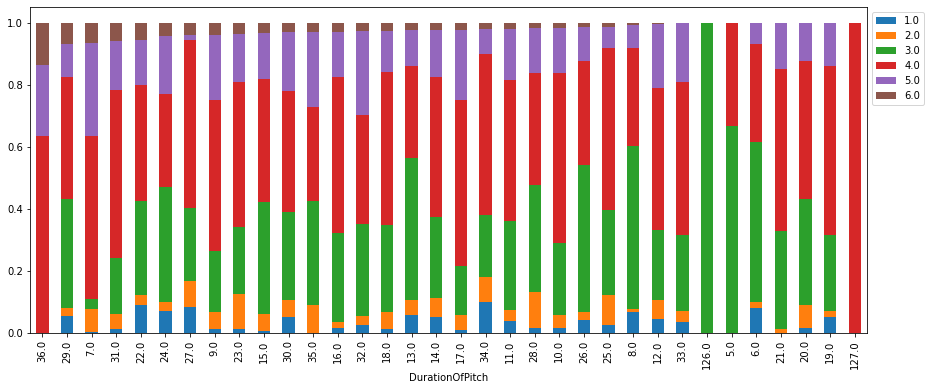

In [110]:
sorter = data["NumberOfFollowups"].value_counts().index[-1]
tab = pd.crosstab(data["DurationOfPitch"], data["NumberOfFollowups"], normalize="index").sort_values(
        by=sorter, ascending=False
    )
tab.plot(kind="bar", stacked=True, figsize=(10
                                            + 5, 6))
plt.legend(loc="lower left", frameon=False)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

#### Observations
1. DurationOfPitch of 127 mins, 36 mins and 7 mins ,17 mins have the higher NumberOfFollowups of 4 which will lead to strongest conversion
2. DurationOfPitch of 29 mins,22 mins, 34 mins , 12 mins have the lower NumberOfFollowups of 1 which will lead to weakest conversion.
3. DurationOfPitch of 126 mins, 5 mins  6 mins,8 mins and 13 mins have a middle NumberOfFollowups of 3 which will lead to moderate conversion.

# Summary of EDA

## Data Description 

## Data Description
1. ProdTaken is the target variable here which is of type int.
2. TypeofContact, Occupation, Gender, ProductPitched, MaritalStatus and Designation are all of type object.
3. Age DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting and MonthlyIncome are all of type float.
4. There are missing values in the Age,TypeofContact,DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting and MonthlyIncome in the dataset.
5. There are no duplicated values in the dataset.

## Data Preprocessing and Cleaning

### Missing values Treatments
1. The data  in TypeofContact is normally distributed and so we can impute the missing values with the mean as it is unskewed data.
2. Since this column DurationOfPitch is a categorical variable, the most frequent value can be used to impute missing values which is the mode.
3. For this column NumberOfFollowups we can take the most frequent value of the numberoffollowups(mode) to impute the missing values.
4. For this column PreferredPropertyStar we can take the most frequent value of the PreferredPropertyStar(mode) to impute the missing values.
5. The data in NumberOfTrips is left skewed and so we can impute the missing values with the median as it is skewed data.
6. For this column NumberOfChildrenVisiting we can take the most frequent value of the NumberOfChildrenVisiting(mode) to impute the missing values.
7. The data in MonthlyIncome is normal distribution with a lot of outliers on either sides.So we can impute the missing values with the mean as it is unskewed data.
### Recategorizing
1. Gender Column we changed  the "Fe male" to "Female".
2. MaritalStatus Column we changed the "Divorced" and "Single" to "Unmarried"
3. Designation column we recategorized into Manager and Excecutive
4. Occupation column we recategorized into Business and Salaried.
### Dropped Column
1. The CustomerID column is the same as the index of the dataset. hence it is better to drop the column.


## Value_count Observations of other columns
1. Most of the cities the customers belong are Tier 1 cities
2. There are very few customers with 1 extra and 5 extra people accompanying them during the trip.
3. 3 followups and 4 folowups are mostly more in number by the salesperson after their first sales pitch.
4. Most of the customers prefer 3 star hotel for the stay.
5. Most of the customers have done more than 2 trips.
6. Almost half of the customers do not have a passport.
7. Most of the customers do own a car.
8. Many customers have 1 or 2 children with age less than 5 travelling with them.
9. Very few customers have 3 children with age less than 5 travelling with them.
10. Most of the customers are on Self Enquiry Type of Contact.
11. Half of customers are salaried and a little more than half are Business Owners
12. Most of the customers are Male.
13. Many customers have opted for the Basic and duluxe product.
14. There are almost equal customers from the married and unmarried categorries.
15. There are almost equal customers from the managers and excecutive categorries.

## Outlier Analysis
1. MonthlyIncome has upper and lower outliers.
2. DurationOfPitch and NumberOfTrips have only upper outliers.
3. Checking in detail for the above 3 outlier analysis.
4. Though there are outliers in the visualization, It is better not to consider them as they will have some valuable information regading the data.


## Outlier detection IQR
#### MonthlyIncome
1. There are 3 observations beyond the 4* times IQR range for the MonthlyIncome Column.
2. All the data are important for the model to make predictions. Hence we will not remove the outliers. They hold valuable informations.
#### NumberOfTrips
1. There are 4 observations beyond the 4* times IQR range for the NumberOfTrips Column.
2. All the data are important for the model to make predictions. Hence we will not remove the outliers. They hold valuable informations.
#### DurationOfPitch
1. There are 2 observations beyond the 4* times IQR range for the DurationOfPitch Column.
2. All the data are important for the model to make predictions. Hence we will not remove the outliers. They hold valuable informations.
## Outlier detection tmean
#### MonthlyIncome
1. There is a small change in the tmean for both the analysis in MonthlyIncome column.
2. Hence we will not remove the outliers. They hold valuable informations.
#### NumberOfTrips
1. There is a small change in the tmean for both the analysis in NumberOfTrips column.
2. Hence we will not remove the outliers. They hold valuable informations.
#### DurationOfPitch
1. There is a small change in the tmean for both the analysis in DurationOfPitch column.
2. Hence we will not remove the outliers. They hold valuable informations.

## Observations from EDA 

#### Monthly Income
1. The monthly income is close to normally distributed with a mean of 23620.
2. There are many outliers in the data but we will not be removing them as they have valuable informations.
3. The MonthlyIncome range varies from 1000 to 98678.
4. 50% of customers have about 22655 as MonthlyIncome per annum.

#### Age
1. The age column is normally distributed woth a mean of 38.
2. There are no outliers in the data.
3. The age range varies from 18 to 61.
4. 50% of customers are of 37 years of age.

#### CityTier
1. 65.3% of customers live in Tier 1 cities.
2. 30.7% live in Tier 3 cities.
3. Only 4.1% of customers live in Tier 2 cities.

#### NumberOfPersonVisiting
1. 49.1% travel in groups of 3 along with the customer for their trips.
2. 29 % travel in groups of 2 along with the customer for their trips.
3. 21% travel in groups of 4 along with the customer for their trips.
4. Less than 1% travel with extra one person.
5. Very few customers travel as 5 memebers for their trips.

#### NumberOfFollowups
1. Of the total number of followups, 43.2% accounts to 4 times follow up done by the Salesperson after their first pitch.
2. Of the total number of followups 30% accounts to 3 times follow up done by the Salesperson after their first pitch.
3. Of the total number of followups 15.7% accounts to 5 times follow up done by the Salesperson after their first pitch.
4. Of the total number of followups less than 5% accounts to 1 and 2 and 6 times follow up done by the Salesperson after their first pitch.

#### PreferredPropertyStar
1. 61.8% of customers prefer 3 star hotel to stay in.
2. 19.6% of customers prefer 5 star accomodation.
3. 18.7% of customers prefer 4 star accomodation.

#### NumberOfTrips
1. 30% of customers have done 2 trips in a year with "Visit With Us".
2. 24.9% of customers have done 3 trips in a year with "Visit With Us".
3. 12.7 of customers have done 1 trip in a year with "Visit With Us".
4. 10% of customers have done 4 trips and 9.4% have done 5 trips with "Visit With Us".
5. 6.6% have done 6 trips and 4.5% f customers have done 7 trips with "Visit With Us".
6. It is surprising to see 2.1% of customers have done 8 trips in a year with "Visit With Us".

#### Passport
1. 70.9% of customers do not have a passport.
2. Only 29.1% of customers have a passport.


#### OwnCar
1. 62% of customers own a car.
2. 38% do not own a car.

#### NumberOfChildrenVisiting
1. 43.9% of customers have 1 child of age less than 5 travelling with them.
2. n27.3% of customers have 2 children of age less than 5 travelling with them.
3. 22.1% of customers have no children of age less than 5 travelling with them.
4. Only 6.6% of customers have 3 children of age less than 5 travelling with them.

#### TypeofContact
1. 71% of customers were contacted by self enquiry.
2. 29% of customers were contacted by companyInvited type of contact.

#### Occupation
1. 51.6% of customers have their own business.
2. 48.4% of customers are salaried people.

#### Gender
1. 59.7& of the customers are male.
2. 40.3% of customers are females.

#### MaritalStatus
1. 52.1% of the customers are unmarried.
2. 47.9% of the customers are married.

#### Designation
1. 50.6% of customers are Managers by profession.
2. 49.4% of customers are Excecutives by profession.

#### ProdTaken
1. This is the target variable.
2. 81.2% of customers have not purchased the product.
3. |Only 18.8% of customers have purchased the product

## Customer Interaction Data

#### PitchSatisfactionScore
1. 30.2% of customers have given a PitchSatisfactionScore of 3.
2. 19.8% of customers have given a PitchSatisfactionScore of 5.
3. 19.3% of customers have given a PitchSatisfactionScore of 1.
4. 18.7% of customers have given a PitchSatisfactionScore of 4.
5. 12% of customers have given a PitchSatisfactionScore of 2.

#### ProductPitched
1. 37.7% of customers were pitched with the basic tour package by the salesperson.
2. 35.4% of customers were pitched with the Deluxe tour package by the salesperson.
3. 15.2% of customers were pitched with the Standard tour package by the salesperson.
4. 7% of customers were pitched with the Super Deluxe tour package by the salesperson.
5. 4.7% of customers were pitched with the King tour package by the salesperson.

#### NumberOfFollowups
1. Of the total number of followups, 43.2% accounts to 4 times follow up done by the Salesperson after their first pitch.
2. Of the total number of followups 30% accounts to 3 times follow up done by the Salesperson after their first pitch.
3. Of the total number of followups 15.7% accounts to 5 times follow up done by the Salesperson after their first pitch.
4. Of the total number of followups less than 5% accounts to 1 and 2 and 6 times follow up done by the Salesperson after their first pitch.

#### Duration Of pitch
1. The data distribution for DurationOfPitch is right skewed.
2. There are outliers present but we will not be removing them as they hold valuable information.
3. The mean durationOfPitch of the salesperson to customers is 15.3 mins.
4. The durationOfPitch ranges from 5 mins to 127 mins.
5. 50% of durationOfPitch of salespersons is 13 mins.

## Correlation
1. NumberOfPersonVisiting and NumberOfChildrenVisiting have a positive correlation of 0.61
2. Age and Monthly Income have a positive correlation of 0.46
3. NumberOfFollowups and NumberOfPersonVisiting have a positive correlation of 0.32
4. ProdTaken and Passport have a positive correlation of 0.26
5. ProdTaken is positively correlated (with a small correlation value) with MonthlyIncome, NumberOfChildrenVisiting, OwnCar, PitchSatisfactionScore, NumberOfTrips, PreferredPropertyStar, NumberOfFollowups, NumberOfPersonVisiting, Durationofpitch and CityTier.
6. ProdTaken is negatively correlated with Age.

## Independant variables W.R.T ProdTaken

**Age W.R.T ProdTaken:** Customers who have taken the package have a median age between 30-34.<br>
**DurationOfPitch W.R.T ProdTaken :** Customers who have taken the package have a median DurationOfPitch of 15 mins.
Higher the DurationOfPitch more likely is a customer to take the tour package<br>
**MonthlyIncome W.R.T ProdTaken**: Customers who have taken the package have a median MonthlyIncome range between 20000-22500.
The more the income customers are not willing to take tour packages.<br>
**TypeofContact W.R.T ProdTaken:** Customers with a Company Invitation have mostly taken the Tour package.<br>
**CityTier W.R.T ProdTaken:** Customers from Tier 2 and Tier 3 Cities have taken more of the tour packages.<br>
**Occupation W.R.T ProdTaken:** Customers having their own business have taken more of the tour packages than salaried people.<br>
**Gender W.R.T ProdTaken:** Both male and female Customers have more or less equally taken the tour packages.<br>
**NumberOfPersonVisiting W.R.T ProdTaken:** Customers with total of 2 or 3 or 4 people together going on a trip have mostly taken the tour package.<br>
**NumberOfFollowups W.R.T ProdTaken:** With 6 or 5 followups there are high changes of customer taking the tour package.<br>
**NumberOfFollowups W.R.T ProdTaken:** Mostly customers have taken the Basic package followed by Standard package.<br>
**PreferredPropertyStar W.R.T ProdTaken:** Mostly customers have a property preference of 5 star and 4 star who have taken the product.<br>
**MaritalStatus W.R.T ProdTaken:** Customers who are mostly unmarried have taken the tour package than married customers.<br>
**NumberOfTrips W.R.T ProdTaken:** For an analysis customers with 7-8 trips per year previously are more likely to take the tour packages.<br>
Customers with 1-6 per year trips previously are also more likely to take the tour packages.<br>
It is surprising to see customers with 19 and 20 trips per year have also opted to take the tour package once more.<br>
**Passport W.R.T ProdTaken:** Customers who have a passport mostly have taken the tour package.<br>
**PitchSatisfactionScore W.R.T ProdTaken :** Customers who have a PitchSatisfactionScore of 3 or 4 or 5 are most likely to take the tour package.<br>
**OwnCar W.R.T ProdTaken :** Both customers owning and not owning a car have more or less equally taken the tour package.<br>   
**NumberOfChildrenVisiting W.R.T ProdTaken :** With no children to about 3 childeren of age less than 5 accompanying the customers all have taken the tour package.<br>
**Designation W.R.T ProdTaken:** Excecutives are more likely to take the tour package than the Managers.<br>

## Business Questions to understand

#### 1. How ProductPitched varies with MonthlyIncome across ProdTaken
Customers with a median salary range between 34000-35000 and tried the King package will most likely take the tour package.<br>
Customers with a median salary range between 29000-30000 and tried the Super Deluxe package will most likely take the tour package.<br>
Customers with a median salary range between 26000-27000 and tried the STandard package will most likely take the tour package.<br>
Customers with a median salary range between 21000-22000 and tried the Basic package will most likely take the tour package.<br>
Customers with a median salary range between 23000-24000 and tried the Deluxe package will most likely take the tour package.<br>

#### 2. How ProductPitched varies with DurationOfPitch across ProdTaken
Customers with standard and Deluxe package and having a higher DurationOfPitch median range of 15-15.5 mins are more likely take a tour package.<br>
Customers with SUper Deluxe and having a higher DurationOfPitch median of range 16-20 mins are more likely to take a tour package.<br>
Customers with Basic package having a median range DurationOfPitch betweem 13.5-15 mins more lkely take the tour package.<br>

#### 3. How ProductPitched varies with Age across ProdTaken
Customers with median age between 52-55 with the King package mostly will choose a tour package.<br>
Customers with median age between 40-45 with the Super Deluxe package mostly will choose a tour package.<br>
Customers with median age between 37-45 with the Standard package mostly will choose a tour package.<br>
Customers with median age between 30-35 with the Basic package mostly will choose a tour package.<br>
Customers with median age between 35-42 with the Deluxe package mostly will choose a tour package.<br>

#### 4. How ProductPitched varies with DurationOfPitch across ProdTaken
Male customers earning with a median range between 20000-23000 will take the tour package.<br>
Female customers earning with a median range between 24000-25000 will take the tour package.<br>

#### 5. How Occupation varies with DurationOfPitch across ProdTaken
Business Customers with a DurationOfPitch median range between 15-18 mins mostly will take the tour package.<br>
Salaried Customers with a DurationOfPitch median range between 13-15 mins mostly will take the tour package.<br>

#### 6. How TypeofContact varies with DurationOfPitch across ProdTaken
Customers who are Company Invited and have a DurationOfPitch median of range 10-15 mins mostly will take the tour package.<br>
Customers who come through Self Enquiry and have a DurationOfPitch median of range 16-18 mins mostly will take the tour package.<br>

#### 7. How MaritalStatus varies with DurationOfPitch across ProdTaken
Married CUstomers with median DurationOfPitch range between 15-18 mins mostly will take the tour package.<br>
Unmarried CUstomers with median DurationOfPitch range between 11-15 mins mostly will take the tour package.<br>

#### 8. How MonthlyIncome varies with Designation across ProdTaken
Excecutives with a median monthly income range of 21000-23000 mostly will take the tour package.<br>
Managers with a median monthly income range of 24000-26000 mostly will take the tour package.<br>

#### 9. How PitchSatisfactionScore varies with DurationOfPitch
DurationOfPitch of 5 mins, 21 mins and 20 mins have the highest PitchSatisfactionScore of 5 which will lead to strongest conversion. <br>
DurationOfPitch of 126 mins,127mins, 28 mins , 22 mins have the lowest PitchSatisfactionScore of 1 which will lead to weakest conversion.<br>
DurationOfPitch of 32 mins, 30 mins and 36 mins have a middle PitchSatisfactionScore of 3 which will lead to moderate conversion.<br>

#### 10. How NumberOfFollowups varies with DurationOfPitch
DurationOfPitch of 127 mins, 36 mins and 7 mins ,17 mins have the higher NumberOfFollowups of 4 which will lead to strongest conversion.<br>
DurationOfPitch of 29 mins,22 mins, 34 mins , 12 mins have the lower NumberOfFollowups of 1 which will lead to weakest conversion.<br>
DurationOfPitch of 126 mins, 5 mins 6 mins,8 mins and 13 mins have a middle NumberOfFollowups of 3 which will lead to moderate conversion.<br>

## Model Building
Below we will be building  models with two methods

1. Bagging and
2. Boosting

In [59]:
data.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Managers,20993.0
1,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Unmarried,2.0,0,3,1,2.0,Managers,20130.0
2,1,37.000000,Self Enquiry,1,8.0,Business,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executives,17090.0
3,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Unmarried,2.0,1,5,1,1.0,Executives,17909.0
4,0,37.622265,Self Enquiry,1,8.0,Business,Male,2,3.0,Basic,4.0,Unmarried,1.0,0,5,1,0.0,Executives,18468.0


## Data Preparation

In [60]:
dummy_data = pd.get_dummies(
    data,
    columns=[
        "TypeofContact",
        "Occupation",
        "Gender",
        "ProductPitched",
        "MaritalStatus",
        "Designation",
        
    ],
    drop_first=True,
)  # creating dummy variables

dummy_data.head()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,TypeofContact_Self Enquiry,Occupation_Salaried,Gender_Male,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Unmarried,Designation_Managers
0,1,41.000000,3,6.0,3,3.0,3.0,1.0,1,2,1,0.0,20993.0,1,1,0,1,0,0,0,1,1
1,0,49.000000,1,14.0,3,4.0,4.0,2.0,0,3,1,2.0,20130.0,0,1,1,1,0,0,0,1,1
2,1,37.000000,1,8.0,3,4.0,3.0,7.0,1,3,0,0.0,17090.0,1,0,1,0,0,0,0,1,0
3,0,33.000000,1,9.0,2,3.0,3.0,2.0,1,5,1,1.0,17909.0,0,1,0,0,0,0,0,1,0
4,0,37.622265,1,8.0,2,3.0,4.0,1.0,0,5,1,0.0,18468.0,1,0,1,0,0,0,0,1,0


## Spliting the Data

In [61]:
X = dummy_data.drop("ProdTaken",axis=1)# Features
y = dummy_data["ProdTaken"]# Label

In [62]:
# split test and train
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [63]:
print(X_train.shape)
print(X_test.shape)

(3421, 21)
(1467, 21)


In [64]:
print("No of rows in training data :",X_train.shape[0])
print("No of rows in test data :",X_test.shape[0] )

No of rows in training data : 3421
No of rows in test data : 1467


In [65]:
print("Percentage of classes in training data")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in testing data")
print(y_test.value_counts(normalize=True))

Percentage of classes in training data
0    0.817597
1    0.182403
Name: ProdTaken, dtype: float64
Percentage of classes in testing data
0    0.798228
1    0.201772
Name: ProdTaken, dtype: float64


##  Model Evaluation Criteria

### Model can make wrong predictions as following:<br>
Predicting a customer will not buy the new tour wellness package  but in reality the customer has bought the package -  (FN)<br>
Predicting a customer will buy the new tour wellness package but in reality the customer did not buy the new wellness tour package - (FP)<br>

### Which Loss is greater ?<br>
Predicting a customer will not buy the new tour wellness package  but in reality the customer has bought the package -  (FN)<br> This will be the greater loss as the Tour Company "Visit with us".<br>

### How to reduce this loss? i.e need to reduce **False Negatives** <br>
Tour Company "Visit with us" would want to reduce false negatives, this can be done by maximizing the **Recall**. Greater the recall lesser the chances of false negatives.<br>

### Why to optimize Recall?
We would want Recall to be maximized, the greater the Recall higher the chances of minimizing false negatives because if a model predicts that a customer buys the tour package, but in reality, that customer doesn't buy  then the company can arrange other ways easily to attract that customers but on the otherhand if we predict that a customer will not buy the tour package but the customer does buy the tour package then the company would have lost a valuable customer which is a huge loss for the company.

First, let's create functions to calculate different metrics and confusion matrix.<br>



In [66]:
def model_performance_metrics_general(model,predictor,target):
    """
    Function to display the evaluation metrics of the model at hand
    model:Classifier
    predictor:Independant Variables
    target:Dependant Variable
    """
    # predicting using the independent variables
    pred = model.predict(predictor)
    
    acc = accuracy_score(target,pred)# to compute Accuracy
    recall= recall_score(target,pred)# to compute recall
    precision= precision_score(target,pred)# to compute precision
    f1 =  f1_score(target,pred)# to compute f1_score
    
    # creating a dataframe of metrics
    df_score = pd.DataFrame({
        "Accuracy":acc,
        "Recall":recall,
        "Precision":precision,
        "F1_Score":f1
    },index=[0]
    )
    return df_score

In [67]:
def confusion_matrix_general(model,predictor,target):
    """
    Function to display the confusion matrics of the model at hand
    model:Classifier
    predictor:Independant Variables
    target:Dependant Variable
    """
    # predicting using the independent variables
    pred = model.predict(predictor)
    cm = confusion_matrix(target,pred)
    labels = np.asarray(
        
       [
           ["{0:0.0f}".format(item)+ "\n{0:.2%}".format(item/cm.flatten().sum())]
           for item in cm.flatten()
       ]
    ).reshape(2,2)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm,annot=labels,fmt="")
    plt.xlabel("Predicted values")
    plt.ylabel("True Values")
    

## Bagging Ensemble Method

We will use total of 6 tyoes of models under Bagging <br>
1. Decision Tree<br>
2. Bagging Classifier<br>
3. Random Forest<br>
**and** <br>
4. Tuned Decision Tree<br>
5. Tuned Bagging Classifier<br>
6. Tuned Random Forest<br>

## Decision Tree Model
We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.<br>
If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.<br>

In this case, we can pass a dictionary {0:0.17,1:0.83} <br>
to the model to specify the weight of each class and the decision tree will give more weightage to class 1.<br>

class_weight is a hyperparameter for the decision tree classifier.<br>

In [269]:
#Fitting the model
dt1 = DecisionTreeClassifier(criterion="gini",class_weight={0:0.17,1:0.83},random_state=1)
dt1.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.17, 1: 0.83},
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=1, splitter='best')

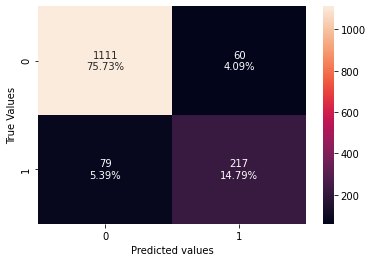

In [271]:
#Creating confusion matrix
confusion_matrix_general(dt1,X_test,y_test)

#### Observations 
##### Confusion Matrix -<br>

Customer bought the tour package and the model predicted it correctly that is customer purchased the tour package : True Positive (observed=1,predicted=1)<br>

Customer didn't buy the tour package  and the model predicted customer will buy : False Positive (observed=0,predicted=1)<br>

Customer didn't buy the tour package  and the model predicted customer will not buy : True Negative (observed=0,predicted=0)<br>

Customer bought the tour package  and the model predicted that customer will not buy tour package : False Negative (observed=1,predicted=0)<br>

In [273]:
#Calculating different metrics
dt1_train_performance=model_performance_metrics_general(dt1,X_train,y_train)
print("Training Performance: \n",dt_train_performance)

Training Performance: 
    Accuracy  Recall  Precision  F1_Score
0       1.0     1.0        1.0       1.0


In [274]:
#Calculating different metrics
dt1_test_performance=model_performance_metrics_general(dt1,X_test,y_test)
print("Testing Performance: \n",dt_test_performance)

Testing Performance: 
    Accuracy    Recall  Precision  F1_Score
0  0.905249  0.733108   0.783394  0.757417


#### Observations
1. Decision tree is working very well on the training data but is not able to generalize well on the test data concerning the recall which is only 72%.

## Bagging Classifier

In [222]:
#Fitting the model
bag = BaggingClassifier(random_state=1)
bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=1, verbose=0,
                  warm_start=False)

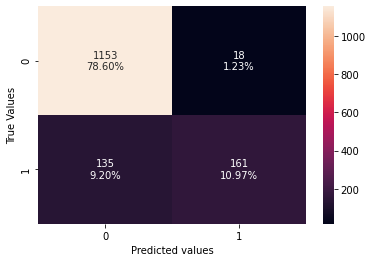

In [223]:
#Creating confusion matrix
confusion_matrix_general(bag,X_test,y_test)

In [224]:
#Calculating different metrics
bag_train_performance=model_performance_metrics_general(bag,X_train,y_train)
print("Training Performance: \n",bag_train_performance)

Training Performance: 
    Accuracy    Recall  Precision  F1_Score
0    0.9924  0.958333        1.0  0.978723


In [225]:
#Calculating different metrics
bag_test_performance=model_performance_metrics_general(bag,X_test,y_test)
print("Testing Performance: \n",bag_test_performance)

Testing Performance: 
    Accuracy    Recall  Precision  F1_Score
0  0.895706  0.543919   0.899441  0.677895


#### Observations
1. Bagging Classifier is working very well on the training data but is not able to generalize well on the test data concerning the recall which is only 53%.

### Bagging CLassifier with weighted Decision Tree as base_estimator

In [226]:
dt = DecisionTreeClassifier(criterion="gini",class_weight={0:0.17,1:0.83},random_state=1)

In [227]:
#Fitting the model
weighted_dt_bag1 = BaggingClassifier(base_estimator=dt,random_state=1)
weighted_dt_bag1.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight={0: 0.17,
                                                                      1: 0.83},
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='depr

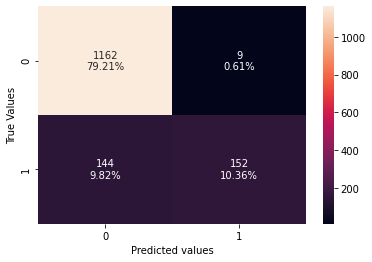

In [228]:
#Creating confusion matrix
confusion_matrix_general(weighted_dt_bag1,X_test,y_test)

In [229]:
#Calculating different metrics
weighted_dt_bag1_train_performance=model_performance_metrics_general(weighted_dt_bag1,X_train,y_train)
print("Training Performance: \n",weighted_dt_bag1_train_performance)

Training Performance: 
    Accuracy    Recall  Precision  F1_Score
0  0.992108  0.956731        1.0  0.977887


In [230]:
#Calculating different metrics
weighted_dt_bag1_test_performance=model_performance_metrics_general(weighted_dt_bag1,X_test,y_test)
print("Testing Performance: \n",weighted_dt_bag1_test_performance)

Testing Performance: 
    Accuracy    Recall  Precision  F1_Score
0  0.895706  0.513514   0.944099  0.665208


### Observations
1. Bagging classifier with a weighted decision tree is giving very good accuracy and prediction but is not able to generalize 
well on test data in terms of recall.

### Bagging Classifier with weighted Decision Tree and parameters n_estimators and bootstrap

In [231]:
dt = DecisionTreeClassifier(criterion="gini",class_weight={0:0.17,1:0.83},random_state=1)

In [232]:
#Fitting the model
weighted_dt_bag2 = BaggingClassifier(base_estimator=dt,n_estimators=120,bootstrap=True,random_state=1)
weighted_dt_bag2.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight={0: 0.17,
                                                                      1: 0.83},
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='depr

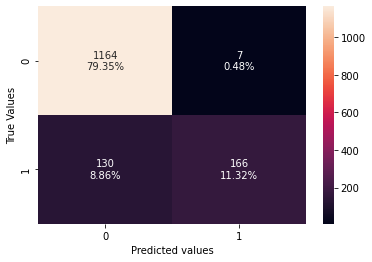

In [233]:
#Creating confusion matrix
confusion_matrix_general(weighted_dt_bag2,X_test,y_test)

In [234]:
#Calculating different metrics
weighted_dt_bag2_train_performance=model_performance_metrics_general(weighted_dt_bag2,X_train,y_train)
print("Training Performance: \n",weighted_dt_bag2_train_performance)

Training Performance: 
    Accuracy  Recall  Precision  F1_Score
0       1.0     1.0        1.0       1.0


In [235]:
#Calculating different metrics
weighted_dt_bag2_test_performance=model_performance_metrics_general(weighted_dt_bag2,X_test,y_test)
print("Testing Performance: \n",weighted_dt_bag2_test_performance)

Testing Performance: 
    Accuracy    Recall  Precision  F1_Score
0  0.906612  0.560811   0.959538  0.707889


### Observations
1. Bagging classifier with a weighted decision tree and with bootstrap anf n_estimators is giving very good accuracy and prediction but is not able to generalize 
well on test data in terms of recall.

## Random Forest

In [236]:
#Fitting the model
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

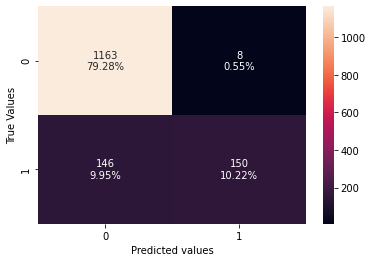

In [237]:
#Creating confusion matrix
confusion_matrix_general(rfc,X_test,y_test)

In [238]:
#Calculating different metrics
rfc_train_performance=model_performance_metrics_general(rfc,X_train,y_train)
print("Training Performance: \n",rfc_train_performance)

Training Performance: 
    Accuracy  Recall  Precision  F1_Score
0       1.0     1.0        1.0       1.0


In [239]:
#Calculating different metrics
rfc_test_performance=model_performance_metrics_general(rfc,X_test,y_test)
print("Testing Performance: \n",rfc_test_performance)

Testing Performance: 
    Accuracy    Recall  Precision  F1_Score
0  0.895024  0.506757   0.949367  0.660793


#### Observations
1. Random Forest has performed well in terms of accuracy and precision, but it is not able to generalize well on the test data in terms of recall.

### Random Forest with weights

In [240]:
#Fitting the model
weighted_rfc = RandomForestClassifier(random_state=1,class_weight={0:0.17,1:0.83})
weighted_rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.17, 1: 0.83}, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)

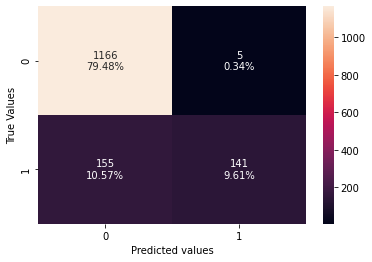

In [241]:
#Creating confusion matrix
confusion_matrix_general(weighted_rfc,X_test,y_test)

In [242]:
#Calculating different metrics
weighted_rfc_train_performance=model_performance_metrics_general(weighted_rfc,X_train,y_train)
print("Training Performance: \n",weighted_rfc_train_performance)

Training Performance: 
    Accuracy  Recall  Precision  F1_Score
0       1.0     1.0        1.0       1.0


In [243]:
#Calculating different metrics
weighted_rfc_test_performance=model_performance_metrics_general(weighted_rfc,X_test,y_test)
print("Testing Performance: \n",weighted_rfc_test_performance)

Testing Performance: 
    Accuracy    Recall  Precision  F1_Score
0  0.890934  0.476351   0.965753  0.638009


#### Observation
There is not much improvement in metrics of weighted random forest as compared to the unweighted random forest.

### Parameters Choosing for Tuned Decision trees

    We tried the below paratmeters for tuning Decision Trees and only the last option gave good results<br>        
    
                "max_depth": np.arange(1, 10),<br>
                "criterion": ["entropy", "gini"],<br>
                "splitter": ["best", "random"],<br>
                "min_impurity_decrease": [0.001, 0.01, 0.1],<br><br>
                    
                    
              'max_depth': np.arange(2,30), <br>
              'min_samples_leaf': [1, 2, 5, 7, 10],<br>
              'max_leaf_nodes' : [2, 3, 5, 10,15, None],<br>
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]<br>
<br>
                
              'max_depth': np.arange(2,30), <br>
              'min_samples_leaf': [ 5, 7, 10],<br>
              'max_leaf_nodes' : [2, 3, 5, 10,15],<br>
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]<br><br>
                
              'max_depth': np.arange(2,10), <br>
              'min_samples_leaf': [5, 7, 10, 15],<br>
              'max_leaf_nodes' : [2, 3, 5, 10,15],<br>
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]<br>
                
                
                "max_depth":np.arange(2, 50),<br>
                'min_samples_leaf': [5, 7, 10, 15],<br>
                'max_leaf_nodes' : [2, 3, 5, 10,15],<br>
                "min_impurity_decrease": [0.000001, 0.00001, 0.0001],<br><br>
                    
              "max_depth': np.arange(2,50), <br>
              'min_samples_leaf': [1,2,3, 5, 7, 10],<br>
              'max_leaf_nodes' : [2, 3, 5, 10,15,None],<br>
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]<br>



## Tuning Decision Tree

In [244]:
# Choose the type of classifier.
dt_estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
                'max_depth': np.arange(2,50), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15, None],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_search = GridSearchCV(dt_estimator,parameters,scoring=scorer,cv=5)
grid_search= grid_search.fit(X_train,y_train)

# Set the classification to the best combination of parameters
dt_estimator =grid_search.best_estimator_

# Fit the best algorithm to the data.
dt_estimator.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=19, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

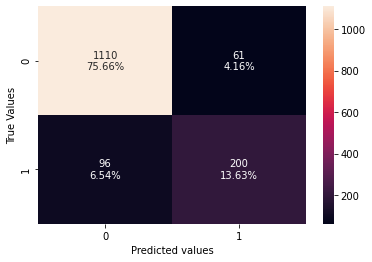

In [246]:
#Creating confusion matrix
confusion_matrix_general(dt_estimator,X_test,y_test)

In [247]:
#Calculating different metrics
dt_estimator_train_performance=model_performance_metrics_general(dt_estimator,X_train,y_train)
print("Training Performance: \n",dt_estimator_train_performance)

Training Performance: 
    Accuracy    Recall  Precision  F1_Score
0  0.993569  0.967949     0.9967  0.982114


In [248]:
#Calculating different metrics
dt_estimator_test_performance=model_performance_metrics_general(dt_estimator,X_test,y_test)
print("Testing Performance: \n",dt_estimator_test_performance)

Testing Performance: 
    Accuracy    Recall  Precision  F1_Score
0  0.892979  0.675676   0.766284  0.718133


#### Observation
1. The overfitting has reduced but the test recall-score has also decreased.
Let's try some other models.

## Tuning Bagging CLassifier

In [252]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(random_state=1,class_weight={0:0.17,1:0.83})
param_grid = {'base_estimator':[cl1],
              'n_estimators':[5,7,15,51,101,112],
              'max_features': [0.7,0.8,0.9,1],
              
              
              
              
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'recall', cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=False, random_state=1,
                                         verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'base_estimator': [DecisionTreeClassifier(ccp_alpha=0.0,
                                                                   class_weight...
                                                                   max_features=None,
                                                                   max_leaf_nodes=None,
                                                                   min_impurity_decrease=0.0,
                                                  

In [253]:
## getting the best estimator
bag_estimator  = grid.best_estimator_
bag_estimator.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight={0: 0.17,
                                                                      1: 0.83},
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='depr

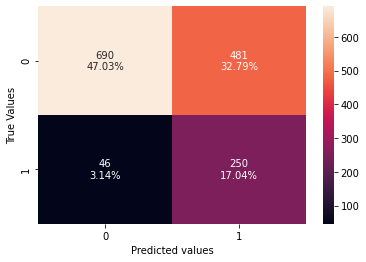

In [254]:
#Creating confusion matrix
confusion_matrix_general(bag_estimator,X_test,y_test)

In [255]:
#Calculating different metrics
bag_estimator_train_performance=model_performance_metrics_general(bag_estimator,X_train,y_train)
print("Training Performance: \n",bag_estimator_train_performance)

Training Performance: 
    Accuracy    Recall  Precision  F1_Score
0  0.700088  0.964744   0.374844   0.53991


In [256]:
#Calculating different metrics
bag_estimator_test_performance=model_performance_metrics_general(bag_estimator,X_test,y_test)
print("Testing Performance: \n",bag_estimator_test_performance)

Testing Performance: 
    Accuracy    Recall  Precision  F1_Score
0  0.640763  0.844595   0.341997  0.486855


## Tuning Random Forest

### Choosing Parameters

  Out of these two the first one is better for parameters than the second <br>
    
                 'max_depth': list(np.arange(5,30,5)) + [None], <br>
                 'max_features': ['sqrt','log2',None],<br>
                'min_samples_leaf': np.arange(1,15,5),<br>
                'min_samples_split': np.arange(2, 20, 5),<br>
                'n_estimators': np.arange(10,110,10)}<br>
                    <br>
                    
                "n_estimators": [110,251,501],<br>
                "min_samples_leaf": np.arange(1, 6,1),<br>
                "max_features": [0.7,0.9,'log2','auto'],<br>
                "max_samples": [0.7,0.9,None],<br>



In [258]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.17,1:0.83},random_state=1)

parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)
}


# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.17, 1: 0.83}, criterion='gini',
                       max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=11,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)

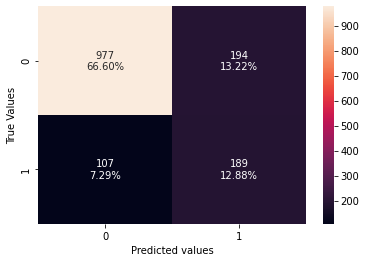

In [259]:
#Creating confusion matrix
confusion_matrix_general(rf_tuned,X_test,y_test)

In [260]:
#Calculating different metrics
rf_tuned_train_performance=model_performance_metrics_general(rf_tuned,X_train,y_train)
print("Training Performance: \n",rf_tuned_train_performance)

Training Performance: 
    Accuracy    Recall  Precision  F1_Score
0  0.812336  0.754808   0.490625  0.594697


In [261]:
#Calculating different metrics
rf_tuned_test_performance=model_performance_metrics_general(rf_tuned,X_test,y_test)
print("Testing Performance: \n",rf_tuned_test_performance)

Testing Performance: 
    Accuracy    Recall  Precision  F1_Score
0  0.794819  0.638514   0.493473  0.556701


## Comparing all the Bagging models

In [275]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dt1_train_performance.T,bag_train_performance.T, weighted_dt_bag1_train_performance.T,weighted_dt_bag2_train_performance.T,rfc_train_performance.T,
    weighted_rfc_train_performance.T,dt_estimator_train_performance.T, bag_estimator_train_performance.T,
     rf_tuned_train_performance.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Bagging Classifier with weighted Decision Tree and parameters n_estimators and bootstrap",
    "Random Forest Classifier",
    "Weighted Random Forest Classifier",
    "Decision Tree Estimator",
    "Bagging Estimator",
    "Random Forest Estimator"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Bagging Classifier,Weighted Bagging Classifier,Bagging Classifier with weighted Decision Tree and parameters n_estimators and bootstrap,Random Forest Classifier,Weighted Random Forest Classifier,Decision Tree Estimator,Bagging Estimator,Random Forest Estimator
Accuracy,1.0,0.992400,0.992108,1.0,1.0,1.0,0.993569,0.700088,0.812336
Recall,1.0,0.958333,0.956731,1.0,1.0,1.0,0.967949,0.964744,0.754808
Precision,1.0,1.000000,1.000000,1.0,1.0,1.0,0.996700,0.374844,0.490625
F1_Score,1.0,0.978723,0.977887,1.0,1.0,1.0,0.982114,0.539910,0.594697


In [276]:
# training performance comparison

models_test_comp_df = pd.concat(
    [dt1_test_performance.T,bag_test_performance.T, weighted_dt_bag1_test_performance.T,weighted_dt_bag2_test_performance.T,rfc_test_performance.T,
    weighted_rfc_test_performance.T,dt_estimator_test_performance.T, bag_estimator_test_performance.T,
     rf_tuned_test_performance.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Bagging Classifier with weighted Decision Tree and parameters n_estimators and bootstrap",
    "Random Forest Classifier",
    "Weighted Random Forest Classifier",
    "Decision Tree Estimator",
    "Bagging Estimator",
    "Random Forest Estimator"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Bagging Classifier,Weighted Bagging Classifier,Bagging Classifier with weighted Decision Tree and parameters n_estimators and bootstrap,Random Forest Classifier,Weighted Random Forest Classifier,Decision Tree Estimator,Bagging Estimator,Random Forest Estimator
Accuracy,0.905249,0.895706,0.895706,0.906612,0.895024,0.890934,0.892979,0.640763,0.794819
Recall,0.733108,0.543919,0.513514,0.560811,0.506757,0.476351,0.675676,0.844595,0.638514
Precision,0.783394,0.899441,0.944099,0.959538,0.949367,0.965753,0.766284,0.341997,0.493473
F1_Score,0.757417,0.677895,0.665208,0.707889,0.660793,0.638009,0.718133,0.486855,0.556701


#### Observations
1. Bagging Estimator performed well on training and test set.
2. Decision Tree performed better than Bagging classifier.
3. Random Forest with default parameters performed not that great  after tuning - As the final results depend on the parameters used/checked using GridSearchCV, There may be yet better parameters which may result in a better performance.

## Feature importance of Weighted Bagging Classifier

In [280]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame( dt1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
DurationOfPitch              0.158175
Age                          0.152985
Passport                     0.112911
MonthlyIncome                0.090671
PitchSatisfactionScore       0.073976
NumberOfFollowups            0.067814
NumberOfTrips                0.046851
CityTier                     0.046824
PreferredPropertyStar        0.042594
MaritalStatus_Unmarried      0.034527
Gender_Male                  0.032258
Designation_Managers         0.021701
NumberOfPersonVisiting       0.020019
ProductPitched_Standard      0.019963
Occupation_Salaried          0.017749
TypeofContact_Self Enquiry   0.017090
ProductPitched_Super Deluxe  0.011387
OwnCar                       0.010945
NumberOfChildrenVisiting     0.010252
ProductPitched_Deluxe        0.008052
ProductPitched_King          0.003258


In [281]:
feature_names = X_train.columns

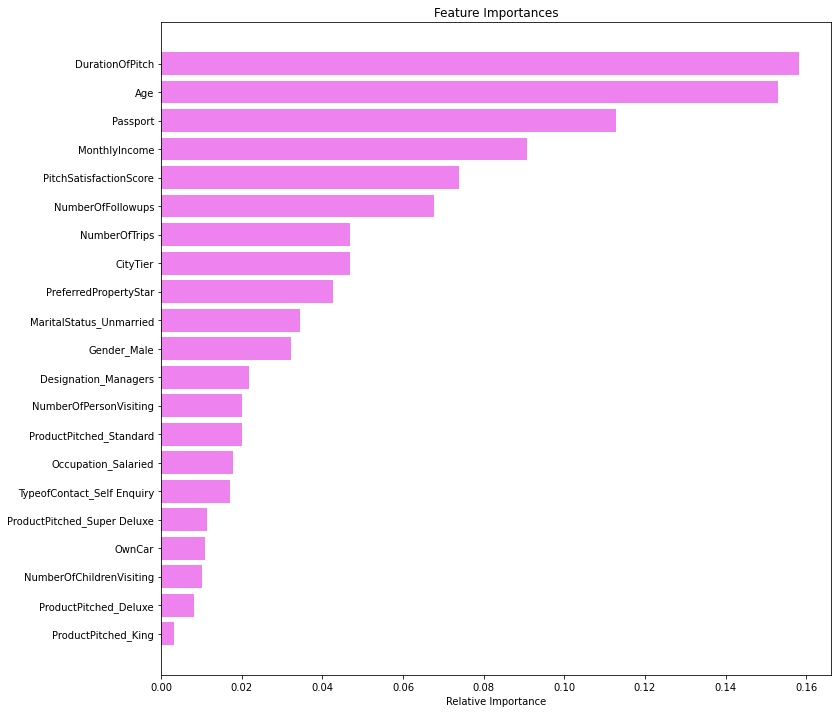

In [282]:
importances = dt1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Observations

1. The Bagging Estimator has performed better than the other models.
2. We use decision tree simple model to know the features which are important as that is the next best model.
3. The variables which are best are <br>
   Duration of Pitch <br>
   Age and <br>
   Passport<br>

## Boosting Ensemble Method<br>

We will use total of 6 types of models under Boosting<br>

Adaboost Boosting<br>
Gradient Boosting<br>
XGB Boosting<br>
**and**<br>
Tuned Adaboost Boosting<br>
Tuned Gradient Boosting<br>
Tuned XGB Boosting<br>

## Adaboost

In [68]:
#Fitting the model
ada_boost_model = AdaBoostClassifier(random_state=1)
ada_boost_model.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

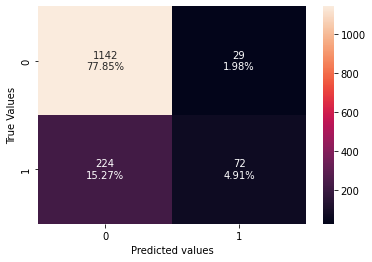

In [69]:
confusion_matrix_general(ada_boost_model,X_test,y_test)

In [70]:
ada_boost_model_train_performance=model_performance_metrics_general(ada_boost_model,X_train,y_train)
print("Training Performance: \n",ada_boost_model_train_performance)

Training Performance: 
    Accuracy  Recall  Precision  F1_Score
0  0.850921  0.3125   0.706522  0.433333


In [71]:
ada_boost_model_test_performance=model_performance_metrics_general(ada_boost_model,X_test,y_test)
print("Testing Performance: \n",ada_boost_model_test_performance)

Testing Performance: 
    Accuracy    Recall  Precision  F1_Score
0  0.827539  0.243243   0.712871   0.36272


## Gradient Boosting Classifier

In [72]:
#Fitting the model
gradient_boost_classifier = GradientBoostingClassifier(random_state=1)
gradient_boost_classifier.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

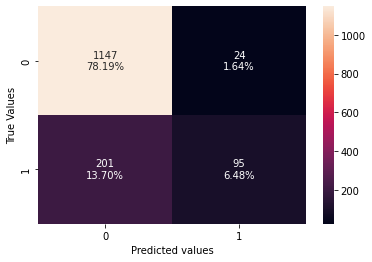

In [73]:
confusion_matrix_general(gradient_boost_classifier,X_test,y_test)

In [74]:
gradient_boost_classifier_train_performance=model_performance_metrics_general(gradient_boost_classifier,X_train,y_train)
print("Training Performance: \n",gradient_boost_classifier_train_performance)

Training Performance: 
    Accuracy   Recall  Precision  F1_Score
0  0.886291  0.44391   0.868339  0.587487


In [75]:
gradient_boost_classifier_test_performance=model_performance_metrics_general(gradient_boost_classifier,X_test,y_test)
print("Testing Performance: \n",gradient_boost_classifier_test_performance)

Testing Performance: 
    Accuracy    Recall  Precision  F1_Score
0  0.846626  0.320946   0.798319  0.457831


## XGB Boosting Classifier

In [76]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

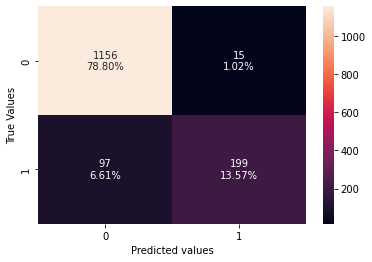

In [77]:
confusion_matrix_general(xgb_classifier,X_test,y_test)

In [78]:
xgb_classifier_train_performance=model_performance_metrics_general(xgb_classifier,X_train,y_train)
print("Training Performance: \n",xgb_classifier_train_performance)

Training Performance: 
    Accuracy    Recall  Precision  F1_Score
0  0.999123  0.995192        1.0   0.99759


In [79]:
xgb_classifier_test_performance=model_performance_metrics_general(xgb_classifier,X_test,y_test)
print("Testing Performance: \n",xgb_classifier_test_performance)

Testing Performance: 
    Accuracy    Recall  Precision  F1_Score
0  0.923654  0.672297   0.929907  0.780392


## AdaBoost HyperTuning

Out of these two 1st is a better option for balanced recall<br>

    "base_estimator":[DecisionTreeClassifier(max_depth=5),DecisionTreeClassifier(max_depth=7),
                      DecisionTreeClassifier(max_depth=11)],<br>
    "n_estimators": np.arange(10,150,10),<br>
    "learning_rate":np.arange(0.1,2,0.1)<br>
        
     "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],<br>
    "n_estimators": np.arange(10,110,10),<br>
    "learning_rate":np.arange(0.1,2,0.1)<br>

In [ ]:
# Choose the type of classifier. 
ada_boost_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=5),DecisionTreeClassifier(max_depth=7),
                      DecisionTreeClassifier(max_depth=11)],
    "n_estimators": np.arange(10,150,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(ada_boost_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ada_boost_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
ada_boost_tuned.fit(X_train, y_train)

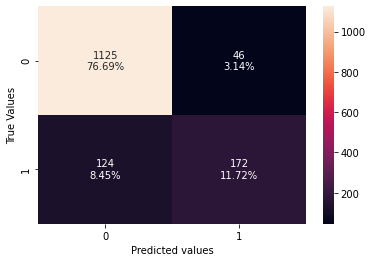

In [93]:
confusion_matrix_general(ada_boost_tuned,X_test,y_test)

In [94]:
ada_boost_tuned_train_performance=model_performance_metrics_general(ada_boost_tuned,X_train,y_train)
print("Training Performance: \n",ada_boost_tuned_train_performance)

Training Performance: 
    Accuracy    Recall  Precision  F1_Score
0  0.995908  0.980769   0.996743  0.988691


In [95]:
ada_boost_tuned_test_performance=model_performance_metrics_general(ada_boost_tuned,X_test,y_test)
print("Testing Performance: \n",ada_boost_tuned_test_performance)

Testing Performance: 
    Accuracy    Recall  Precision  F1_Score
0  0.884117  0.581081   0.788991  0.669261


## Gradient Boost Tuning

Out of all these the last one was the best set of parameters<br>


    "max_features":[0.7,0.8,0.9,1],<br>
    "n_estimators": [10,30,50],<br>
    "subsample":[0.7,0.9,1],<br>
    "learning_rate":[0.05, 0.1,0.2],<br><br>
        
        
    "n_estimators": [100,150,200,250],<br>
    "subsample":[0.8,0.9,1],<br>
    "max_features":[0.7,0.8,0.9,1]
        <br>
    
    "max_features":[0.7,0.8,0.9,1],<br>
    "n_estimators": [100,150,200,250],<br>
    "subsample":[0.7,0.9,1],<br>
    "learning_rate":[0.05, 0.1,0.2],<br>

In [102]:
# Choose the type of classifier. 
gradient_tuning = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
   
    "max_features":[0.7,0.8,0.9,1],
    "n_estimators": [100,150,200,250],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(gradient_tuning, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gradient_tuning = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gradient_tuning.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse',
                           init=AdaBoostClassifier(algorithm='SAMME.R',
                                                   base_estimator=None,
                                                   learning_rate=1.0,
                                                   n_estimators=50,
                                                   random_state=1),
                           learning_rate=0.2, loss='deviance', max_depth=3,
                           max_features=0.8, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=250,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
             

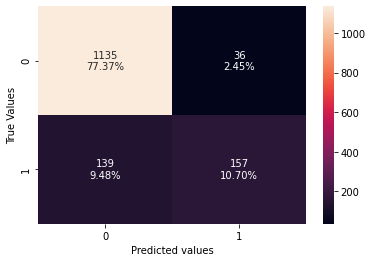

In [103]:
confusion_matrix_general(gradient_tuning,X_test,y_test)

In [104]:
gradient_tuning_train_performance=model_performance_metrics_general(gradient_tuning,X_train,y_train)
print("Training Performance: \n",gradient_tuning_train_performance)

Training Performance: 
    Accuracy    Recall  Precision  F1_Score
0  0.952645  0.772436   0.960159  0.856128


In [105]:
gradient_tuning_test_performance=model_performance_metrics_general(gradient_tuning,X_test,y_test)
print("Testing Performance: \n",gradient_tuning_test_performance)

Testing Performance: 
    Accuracy    Recall  Precision  F1_Score
0  0.880709  0.530405   0.813472  0.642127


## XGB Boost Tuning 

In [79]:
# Choose the type of classifier. 
xgb_tuning = XGBClassifier(random_state=1, eval_metric='logloss',ver)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuning, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuning = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuning.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=0.9,
              enable_categorical=False, eval_metric='logloss', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=5,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

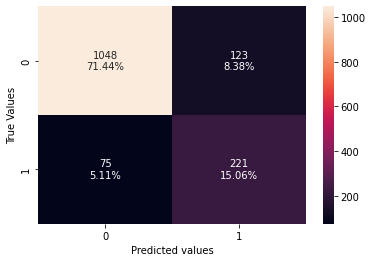

In [80]:
confusion_matrix_general(xgb_tuning,X_test,y_test)

In [81]:
xgb_tuning_train_performance=model_performance_metrics_general(xgb_tuning,X_train,y_train)
print("Training Performance: \n",xgb_tuning_train_performance)

Training Performance: 
    Accuracy    Recall  Precision  F1_Score
0  0.912306  0.934295   0.692399  0.795362


In [82]:
xgb_tuning_test_performance=model_performance_metrics_general(xgb_tuning,X_test,y_test)
print("Testing Performance: \n",xgb_tuning_test_performance)

Testing Performance: 
    Accuracy    Recall  Precision  F1_Score
0  0.865031  0.746622   0.642442  0.690625


## Stacking Ensemble Method

#### OPtion 1
Using estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)] and <br>

final_estimator = xgb_tuned<br>

#### option 2<br>

estimators = [('Random Forest',rfc), ('Gradient Boosting',gradient_tuning), ('Decision Tree',dt)]<br>

final_estimator = weighted_rfc<br>

## Stacking Classifier

In [133]:
estimators = [('Random Forest',rfc), ('Gradient Boosting',gradient_tuning), ('Decision Tree',dt)]

final_estimator = weighted_rfc

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(cv=None,
                   estimators=[('Random Forest',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                          

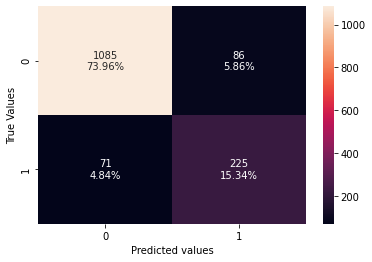

In [134]:
confusion_matrix_general(stacking_classifier,X_test,y_test)

In [135]:
stacking_classifier_train_performance=model_performance_metrics_general(stacking_classifier,X_train,y_train)
print("Training Performance: \n",stacking_classifier_train_performance)

Training Performance: 
    Accuracy    Recall  Precision  F1_Score
0  0.990354  0.975962   0.971292  0.973621


In [136]:
stacking_classifier_test_performance=model_performance_metrics_general(stacking_classifier,X_test,y_test)
print("Testing Performance: \n",stacking_classifier_test_performance)

Testing Performance: 
    Accuracy    Recall  Precision  F1_Score
0  0.892979  0.760135   0.723473  0.741351


## Comparing all Models

In [8]:
# training performance comparison


print("Training Recall performance comparison:\n\n")
print("Adaboost Classifier : 0.3125 \n")
print("Gradient Boost Classifier : 0.44391 \n")
print("XGBoost Classifier : 0.995192 \n")
print("Adabosst Classifier Tuned : 0.980769 \n")
print("Gradient Boost Classifier Tuned : 0.772436 \n")
print("XGBoost Classifier Tuned : 0.934295 \n")
print("Stacking Classifier : 0.975962 \n")




Training Recall performance comparison:


Adaboost Classifier : 0.3125 

Gradient Boost Classifier : 0.44391 

XGBoost Classifier : 0.995192 

Adabosst Classifier Tuned : 0.980769 

Gradient Boost Classifier Tuned : 0.772436 

XGBoost Classifier Tuned : 0.934295 

Stacking Classifier : 0.975962 



In [9]:
# testing performance comparison


print("Testing Recall performance comparison:\n\n")
print("Adaboost Classifier : 0.243243 \n")
print("Gradient Boost Classifier : 0.320946 \n")
print("XGBoost Classifier : 0.672297 \n")
print("Adabosst Classifier Tuned : 0.581081 \n")
print("Gradient Boost Classifier Tuned : 0.530405 \n")
print("XGBoost Classifier Tuned : 0.746622 \n")
print("Stacking Classifier : 0.760135 \n")



Testing Recall performance comparison:


Adaboost Classifier : 0.243243 

Gradient Boost Classifier : 0.320946 

XGBoost Classifier : 0.672297 

Adabosst Classifier Tuned : 0.581081 

Gradient Boost Classifier Tuned : 0.530405 

XGBoost Classifier Tuned : 0.746622 

Stacking Classifier : 0.760135 



#### Observations
1. The stacking Classifier has the best recall score.

We can use this model to train and test new data.

## Business Recommendations and Insights

## Wellness Package recommendations

The company should have te following points while making any decisions regaring the marketing and promotions of the **WELLNESS PROGRAMME**.
1. People with age 35 and above will look for the wellness package.
2. People with higher income range will also choose for the wellness package.
3. The tour comapny "Visit with us" should have 2 tour packages one for high income and one for little moderate income people.
4. CUstomers with a middle income range should be mostly targeted as they will have time for such activities and not be burdened by work or money.
5. Company Invitation have to be sent out to all potential customers as they have high conversion rates.
6. CUstomers from CityTier 2 and 3 can be mostly targeted as per the EDA.
7. Customers with a business background will be more suited for this as they will hold much stress and will have extra money and time.
8. Exceutives are also  a good target for this Wellness programme.
### Customer Interation Data 

#### PitchSatisfactionScore
For the wellness programme the pitch shoul be in such a way that the score reaches 5. They should target customers present age issues
like stress, anxiety and whole wellness for body ,mind and soul for the entire family.
ProductPitched
#### Wellness product. 
This can be combined with various other products which are existing.
This product can also be given based on tne income and age of a customer.
If the customer is travelling with family they can also be given a wellness programme for the whole family based on that as well.
#### NumberOfFollowups
Having about 4 folowups after the first pitch is a good conversion rate for the company as per the EDA status.
#### Duration Of pitch
DurationOfPitch of the salesperson to customers can be about 15.3 mins which is good for a good conversion rate